Instal and import nimare version 0.0.10rc2 

In [1]:
pip install nimare

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install duecredit

Note: you may need to restart the kernel to use updated packages.


In [3]:
import nimare

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


In [4]:
nimare.__version__

'0.0.10rc2'

In [8]:
pip install nimare==0.0.10rc2

Note: you may need to restart the kernel to use updated packages.


In [251]:
import nimare

In [252]:
nimare.__version__

'0.0.10rc2'

# Import librairies

In [253]:
import os
import pandas as pd
import nimare as nm 

from nilearn.image import math_img
from nilearn.plotting import plot_stat_map

from nimare.correct import FWECorrector
from nimare.io import convert_sleuth_to_dataset
from nimare.meta.cbma import ALE, ALESubtraction
from nimare.tests.utils import get_test_data_path

Import files containing the data of the included experiments 

In [254]:
need_file = ('/Users/laurencegrenier/Desktop/Fasted-satieted_hunge in response to relevant stimuli - copie (1) - copie.txt')

want_file = ('/Users/laurencegrenier/Desktop/coordonnées désir-wants all (1) - copie.txt')


Convert the files into sleuth files so the ALE meta-analysis could be operate 

In [255]:
need_set = convert_sleuth_to_dataset(need_file)

want_set = convert_sleuth_to_dataset(want_file)

Explore the Data

In [256]:
need_set.metadata #pandas dataframe of the need file 

id  \
0   Cheah, Y. S., Lee, S., Ashoor, G., Nathan, Y.,...   
1   Frank, S., Laharnar, N., Kullmann, S., Veit, R...   
2   Führer, D., Zysset, S., & Stumvoll, M. (2008)-...   
3   Green, E., Jacobson, A., Haase, L., & Murphy, ...   
4   Green, E., Jacobson, A., Haase, L., & Murphy, ...   
5   Green, E., Jacobson, A., Haase, L., & Murphy, ...   
6   Haase, L., Cerf-Ducastel, B., & Murphy, C. (20...   
7   Haase, L., Cerf-Ducastel, B., & Murphy, C. (20...   
8   Haase, L., Cerf-Ducastel, B., & Murphy, C. (20...   
9   Haase, L., Cerf-Ducastel, B., & Murphy, C. (20...   
10  Haase, L., Green, E., & Murphy, C. (2011)-Hung...   
11  Haase, L., Green, E., & Murphy, C. (2011)-Hung...   
12  Haase, L., Green, E., & Murphy, C. (2011)-Hung...   
13  Haase, L., Green, E., & Murphy, C. (2011)-Hung...   
14  Haase, L., Green, E., & Murphy, C. (2011)-Hung...   
15  Harding, I. H., Andrews, Z. B., Mata, F., Orla...   
16  He, Q., Huang, X., Zhang, S., Turel, O., Ma, L...   
17  Holsen, L. M., Zarcone, J. R., Brooks, W. M., ...   
18  Holsen, L. M., Zarcone, J. R., Brooks, W. M., ...   
19              Holsen,2005-Premeal : Food > non-food   
20  Jacobson, A., Green, E., & Murphy, C. (2010)-H...   
21  Jacobson, A., Green, E., & Murphy, C. (2010)-H...   
22  Jacobson, A., Green, E., & Murphy, C. (2010)-H...   
23  Jacobson, A., Green, E., & Murphy, C. (2010)-H...   
24  Jacobson, A., Green, E., & Murphy, C. (2010)-H...   
25  Jacobson, A., Green, E., & Murphy, C. (2010)-H...   
26  Jacobson, A., Green, E., & Murphy, C. (2010)-H...   
27  Jacobson, A., Green, E., & Murphy, C. (2010)-H...   
28  Jacobson,2019-Whole-brain activation to odor d...   
29  Jiang, T., Soussignan, R., Schaal, B., & Royet...   
30  Jiang, T., Soussignan, R., Schaal, B., & Royet...   
31  Jiang, T., Soussignan, R., Schaal, B., & Royet...   
32  LaBar, K. S., Gitelman, D. R., Parrish, T. B.,...   
33                          Martens,2013-Fasted: F>NF   
34     Martens,2013-Fasted: correlation F>NF with BMI   
35       Martens,2013-Fasted: stimuli - subject group   
36  Uher, R., Treasure, J., Heining, M., Brammer, ...   
37  Uher, R., Treasure, J., Heining, M., Brammer, ...   

                                             study_id  \
0   Cheah, Y. S., Lee, S., Ashoor, G., Nathan, Y.,...   
1   Frank, S., Laharnar, N., Kullmann, S., Veit, R...   
2       Führer, D., Zysset, S., & Stumvoll, M. (2008)   
3   Green, E., Jacobson, A., Haase, L., & Murphy, ...   
4   Green, E., Jacobson, A., Haase, L., & Murphy, ...   
5   Green, E., Jacobson, A., Haase, L., & Murphy, ...   
6   Haase, L., Cerf-Ducastel, B., & Murphy, C. (2009)   
7   Haase, L., Cerf-Ducastel, B., & Murphy, C. (2009)   
8   Haase, L., Cerf-Ducastel, B., & Murphy, C. (2009)   
9   Haase, L., Cerf-Ducastel, B., & Murphy, C. (2009)   
10          Haase, L., Green, E., & Murphy, C. (2011)   
11          Haase, L., Green, E., & Murphy, C. (2011)   
12          Haase, L., Green, E., & Murphy, C. (2011)   
13          Haase, L., Green, E., & Murphy, C. (2011)   
14          Haase, L., Green, E., & Murphy, C. (2011)   
15  Harding, I. H., Andrews, Z. B., Mata, F., Orla...   
16  He, Q., Huang, X., Zhang, S., Turel, O., Ma, L...   
17  Holsen, L. M., Zarcone, J. R., Brooks, W. M., ...   
18  Holsen, L. M., Zarcone, J. R., Brooks, W. M., ...   
19                                        Holsen,2005   
20       Jacobson, A., Green, E., & Murphy, C. (2010)   
21       Jacobson, A., Green, E., & Murphy, C. (2010)   
22       Jacobson, A., Green, E., & Murphy, C. (2010)   
23       Jacobson, A., Green, E., & Murphy, C. (2010)   
24       Jacobson, A., Green, E., & Murphy, C. (2010)   
25       Jacobson, A., Green, E., & Murphy, C. (2010)   
26       Jacobson, A., Green, E., & Murphy, C. (2010)   
27       Jacobson, A., Green, E., & Murphy, C. (2010)   
28                                      Jacobson,2019   
29  Jiang, T., Soussignan, R., Schaal, B., & Royet...   
30  Jiang, T., Soussignan, R., Schaal, B., & Royet...   
31 

In [257]:
need_set.coordinates

id  \
92  Cheah, Y. S., Lee, S., Ashoor, G., Nathan, Y.,...   
25  Frank, S., Laharnar, N., Kullmann, S., Veit, R...   
24  Frank, S., Laharnar, N., Kullmann, S., Veit, R...   
23  Frank, S., Laharnar, N., Kullmann, S., Veit, R...   
22  Frank, S., Laharnar, N., Kullmann, S., Veit, R...   
..                                                ...   
97                          Martens,2013-Fasted: F>NF   
99     Martens,2013-Fasted: correlation F>NF with BMI   
98       Martens,2013-Fasted: stimuli - subject group   
91  Uher, R., Treasure, J., Heining, M., Brammer, ...   
90  Uher, R., Treasure, J., Heining, M., Brammer, ...   

                                             study_id  \
92  Cheah, Y. S., Lee, S., Ashoor, G., Nathan, Y.,...   
25  Frank, S., Laharnar, N., Kullmann, S., Veit, R...   
24  Frank, S., Laharnar, N., Kullmann, S., Veit, R...   
23  Frank, S., Laharnar, N., Kullmann, S., Veit, R...   
22  Frank, S., Laharnar, N., Kullmann, S., Veit, R...   
..                                                ...   
97                                       Martens,2013   
99                                       Martens,2013   
98                                       Martens,2013   
91  Uher, R., Treasure, J., Heining, M., Brammer, ...   
90  Uher, R., Treasure, J., Heining, M., Brammer, ...   

                                          contrast_id      x      y      z  \
92                     FASTED > FED x Visual food cue  35.70 -21.82  -3.04   
25  influence of hunger, gender and calorie conten... -24.00 -72.00  -3.00   
24  influence of hunger, gender and calorie conten...   9.00  21.00 -12.00   
23  influence of hunger, gender and calorie conten... -24.00  18.00  60.00   
22  influence of hunger, gender and calorie conten... -15.00  48.00  -6.00   
..                                                ...    ...    ...    ...   
97                                       Fasted: F>NF   3.35 -15.99   3.66   
99                  Fasted: correlation F>NF with BMI -13.24  17.18 -19.51   
98                    Fasted: stimuli - subject group -13.25  20.37 -19.82   
91  Fasting > satiety x food-related stimuli (Chic...   9.21  30.08  48.31   
90  Fasting > satiety x food-related stimuli (Choc...  52.01  15.10  12.08   

      space   i   j   k  
92  ale_2mm  27  52  34  
25  ale_2mm  57  27  34  
24  ale_2mm  40  73  30  
23  ale_2mm  57  72  66  
22  ale_2mm  52  87  33  
..      ...  ..  ..  ..  
97  ale_2mm  43  55  37  
99  ale_2mm  51  71  26  
98  ale_2mm  51  73  26  
91  ale_2mm  40  78  60  
90  ale_2mm  18  70  42  

[494 rows x 10 columns]

In [258]:
need_set.coordinates.columns

Index(['id', 'study_id', 'contrast_id', 'x', 'y', 'z', 'space', 'i', 'j', 'k'], dtype='object')

# Generating MA map for each study

MA maps of the need_set 

<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine: 
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code     

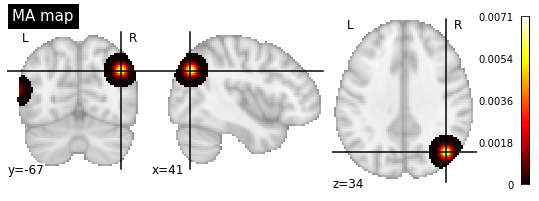

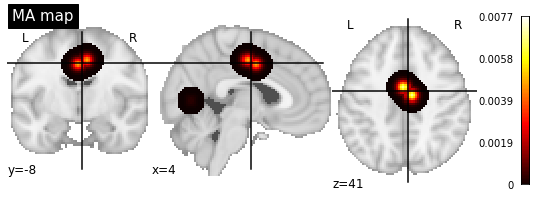

In [259]:
from nimare.meta.kernel import ALEKernel

kernel = nm.meta.kernel.ALEKernel() 

need_MA = kernel.transform(need_set, return_type="image")

plot_stat_map(need_MA[2], title="MA map")
plot_stat_map(need_MA[3], title="MA map")
type(need_MA)

print (need_MA[2])

print (need_MA[3])

In [260]:
type(need_MA)

list

In [261]:
len(need_MA)

38

In [262]:
type(need_MA[3])

nibabel.nifti1.Nifti1Image

MA maps of the want_set

<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine: 
[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  1.  1.  1.  1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code     

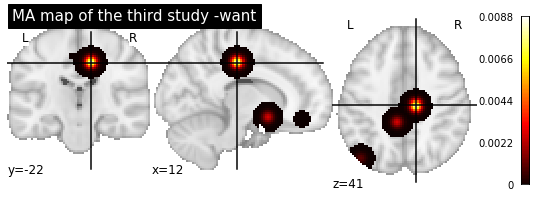

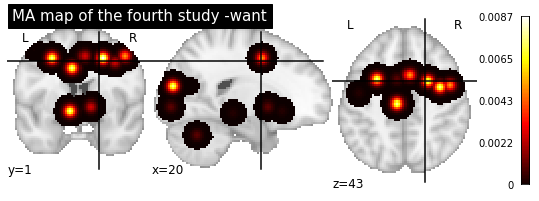

In [286]:
kernel = nm.meta.kernel.ALEKernel() 

want_MA = kernel.transform(want_set, return_type="image")

plot_stat_map(want_MA[2], title="MA map of the third study -want")
plot_stat_map(want_MA[3], title="MA map of the fourth study -want")
type(want_MA)

print (want_MA[2])

print (want_MA[3])

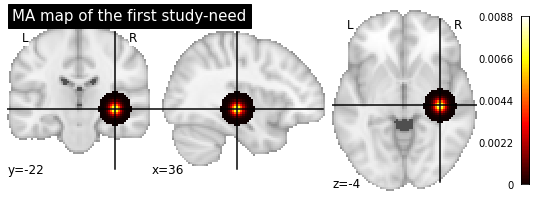

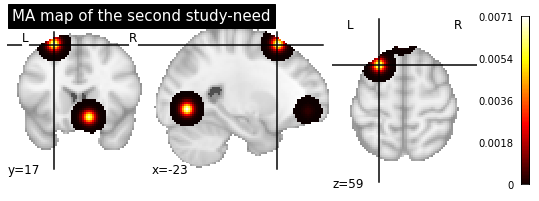

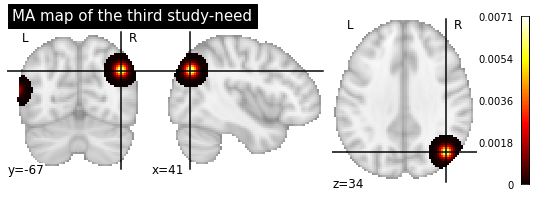

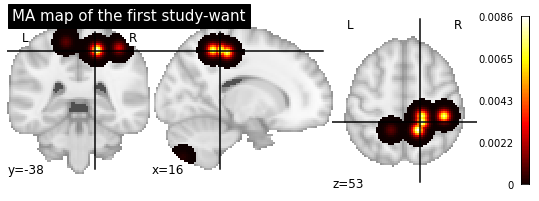

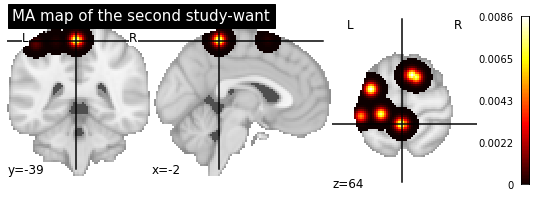

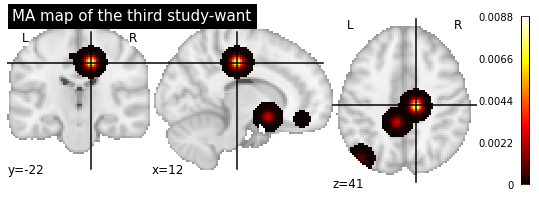

In [287]:
#save the MA maps as an example to show in the presentation 

need_MA_map_0 = plot_stat_map(need_MA[0], title="MA map of the first study-need")
need_MA_map_1 = plot_stat_map(need_MA[1], title="MA map of the second study-need")
need_MA_map_2 = plot_stat_map(need_MA[2], title="MA map of the third study-need")

want_MA_map_0 = plot_stat_map(want_MA[0], title="MA map of the first study-want")
want_MA_map_1 = plot_stat_map(want_MA[1], title="MA map of the second study-want")
want_MA_map_2 = plot_stat_map(want_MA[2], title="MA map of the third study-want")

need_MA_map_0.savefig('MA map of the first study-need.png')
need_MA_map_1.savefig('MA map of the second study-need.png')
need_MA_map_2.savefig('MA map of the third study-need.png')

want_MA_map_0.savefig('MA map of the first study-want.png')
want_MA_map_1.savefig('MA map of the second study-want.png')
want_MA_map_2.savefig('MA map of the third study-want.png')

# Prepare the data for machine learning
-Mask to select the grey matter

In [288]:
#extraire les valeurs de tous les voxels de la matière grise, trouver un masque 
#standardize =false 
#maske_strategy = template 

In [289]:
from sklearn.decomposition import FastICA

from nilearn.image import smooth_img

from nilearn.datasets import load_mni152_brain_mask
from nilearn.input_data import NiftiMasker

from nilearn import plotting
import matplotlib.pyplot as plt

from nilearn.plotting import plot_anat, plot_stat_map, plot_img, plot_roi

In [290]:
 #creating the mask 
mask_img = load_mni152_brain_mask()
masker = NiftiMasker(mask_img=mask_img, standardize = False, mask_strategy = 'template')
mask = masker.fit()
type(mask)

nilearn.input_data.nifti_masker.NiftiMasker

In [296]:
#Apply the mask to the 4 study of the need_set just to see 

need_img_3 = need_MA[3]
need_MA3_mask = mask.fit_transform(need_img_3)

need_MA3_mask.shape
type(need_MA3_mask)

numpy.ndarray

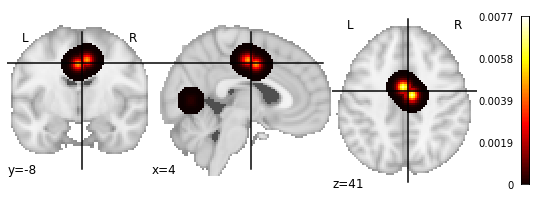

In [292]:
#Visualize the data of the 4th study with the mask
need_MA3_plt_mask = mask.inverse_transform(need_MA3_mask)

MA_img = plot_stat_map(need_MA3_plt_mask)

Save the map with the mask of the first, second and third study of the need and the want to show as an example in the presentation

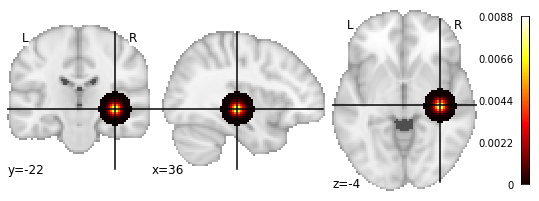

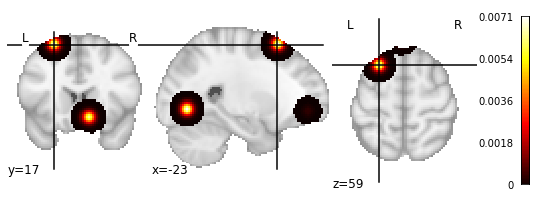

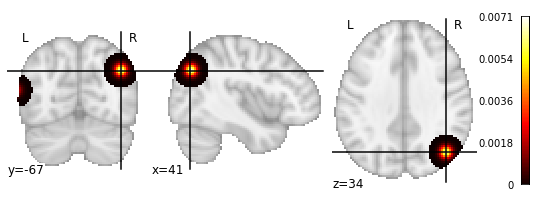

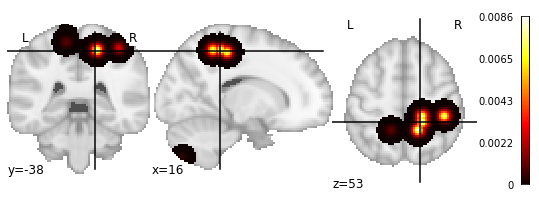

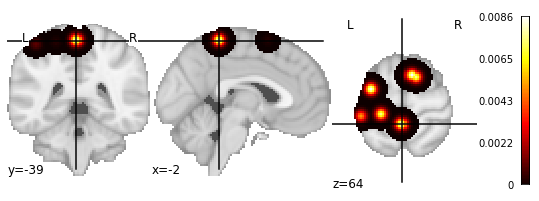

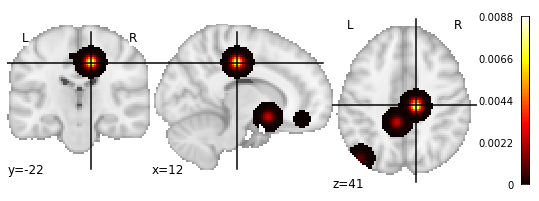

In [297]:
need_img_0 = need_MA[0]
need_MA0_mask = mask.fit_transform(need_img_0)
need_MA0_plt_mask = mask.inverse_transform(need_MA0_mask)
mask_MA_need_0 = plot_stat_map(need_MA0_plt_mask)
mask_MA_need_0.savefig('Masked MA map of the first study-need.png')

need_img_1 = need_MA[1]
need_MA1_mask = mask.fit_transform(need_img_1)
need_MA1_plt_mask = mask.inverse_transform(need_MA1_mask)
mask_MA_need_1 = plot_stat_map(need_MA1_plt_mask)
mask_MA_need_1.savefig('Masked MA map of the second study-need.png')

need_img_2 = need_MA[2]
need_MA2_mask = mask.fit_transform(need_img_2)
need_MA2_plt_mask = mask.inverse_transform(need_MA2_mask)
mask_MA_need_2 = plot_stat_map(need_MA2_plt_mask)
mask_MA_need_2.savefig('Masked MA map of the third study-need.png')

want_img_0 = want_MA[0]
want_MA0_mask = mask.fit_transform(want_img_0)
want_MA0_plt_mask = mask.inverse_transform(want_MA0_mask)
mask_MA_want_0 = plot_stat_map(want_MA0_plt_mask)
mask_MA_want_0.savefig('Masked MA map of the first study-want.png')

want_img_1 = want_MA[1]
want_MA1_mask = mask.fit_transform(want_img_1)
want_MA1_plt_mask = mask.inverse_transform(want_MA1_mask)
mask_MA_want_1 = plot_stat_map(want_MA1_plt_mask)
mask_MA_want_1.savefig('Masked MA map of the second study-want.png')

want_img_2 = want_MA[2]
want_MA2_mask = mask.fit_transform(want_img_2)
want_MA2_plt_mask = mask.inverse_transform(want_MA2_mask)
mask_MA_want_2 = plot_stat_map(want_MA2_plt_mask)
mask_MA_want_2.savefig('Masked MA map of the third study-want.png')



In [298]:
#Apply the mask on all of the studies in the need_set 
print(len(need_MA))


need_mask = []

for i in range (len(need_MA)): 
    need_img = need_MA[i]
    need_MA_mask = mask.fit_transform(need_img)
    #need_MA_plt_mask = mask.inverse_transform(need_MA_mask)
    #MA_mask_map = plot_stat_map(need_MA_plt_mask)
    #plt.show()
    
    need_mask.append(need_MA_mask) 
print(len(need_mask))

38
38


In [299]:
#Apply the mask on all of the studies in the want_set 
print(len(need_MA))


want_mask = []

for i in range (len(want_MA)): 
    want_img = want_MA[i]
    want_MA_mask = mask.fit_transform(want_img)
    #want_MA_plt_mask = mask.inverse_transform(want_MA_mask)
    #MA_mask_map = plot_stat_map(want_MA_plt_mask)
    #plt.show()
    
    want_mask.append(want_MA_mask) 
print(len(want_mask))

38
33


In [300]:
print(type(want_mask))
print(need_mask) 
len(need_mask)

<class 'list'>
[array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.37026548e-12, 7.86974837e-12, 0.00000000e+00]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[1.05694523e-06, 9.49356996e-07, 6.87956167e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ...,

38

In [301]:
#Fix the 3D problem, convert 3D array of the 38 element of the list into 1D array (concatenate all the dimensions) 

Reducing dimension of the need_mask by transforming each of the need_mask[i] element into an array of 1D 

In [302]:
need_reduce_mask = []
for i in range (len(need_mask)): 
    a = need_mask[i] #create a variable for the array of the item in the need_mask list 
    b = a.view() #.view to make sure that the initial data doesn't get modify 
    c = b.reshape(228453) #reshape the b which means reshape the need_mask[i] into 1D of 228 453 voxels 
    need_reduce_mask.append(c) #create a new array containing the 38 element of need_mask reshape into 1D 
    print(c) 

print(need_reduce_mask)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.37026548e-12
 7.86974837e-12 0.00000000e+00]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[1.05694523e-06 9.49356996e-07 6.87956167e-07 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[6.35488070e-11 4.45746201e-10 2.41140708e-09 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ...

In [303]:
print(len(need_reduce_mask))
print(need_reduce_mask[1])
print(len(need_reduce_mask[1]))

#J'ai un doute sur le contenu de need_reduce_mask, j'ai l'impression que certains tableaux sont seulement des 0
#comme si les voxels 0 avaient été regroupées... voir entrée 156 

38
[0. 0. 0. ... 0. 0. 0.]
228453


In [304]:
print(len(need_mask[1]))
print(len(need_reduce_mask[1]))
#check if the reduce dimension worked 

1
228453


Reducing dimension of the want_mask by transforming each of the need_mask[i] element into an array of 1D

In [305]:
want_reduce_mask = []
for i in range (len(want_mask)): 
    a = want_mask[i] #create a variable for the array of the item in the need_mask list 
    b = a.view() #.view to make sure that the initial data doesn't get modify 
    c = b.reshape(228453) #reshape the b which means reshape the need_mask[i] into 1D of 228 453 voxels 
    want_reduce_mask.append(c) #create a new array containing the 38 element of need_mask reshape into 1D 
    print(c) 

print(want_reduce_mask)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[1.87374494e-05 3.65598204e-05 5.45984360e-05 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., .

In [306]:
len(want_reduce_mask)

33

In [307]:
len(want_reduce_mask[1])

228453

Creating the variables of the model 
X = features (71)
y = condition (need/want) 

In [308]:
#Making the X variable of the model, concatenante the need_reduce_mask and the want_reduce_mask 

X = need_reduce_mask + want_reduce_mask 
#print(X)
print(X[1][228433])

print(len(X))

0.0
71


Creating the variable Y : 0 = needs, 1 = wantings 

In [309]:
y = []
for i in range (38): 
    y_i = 0 
    y.append(y_i)
print(y)
len(y)

for i in range (33): 
    y_i = 1 
    y.append(y_i)
print (y) 
len (y)
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


71

# Creating the machine learning model 

In [310]:
#Make sure that X and y are ok 
print (X)
print (y)
type (X)

[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.37026548e-12, 7.86974837e-12, 0.00000000e+00]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1.05694523e-06, 9.49356996e-07, 6.87956167e-07, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array

list

In [311]:
import numpy as np
np.save("test_data/X.npy", X)
np.save("test_data/y.npy", y)

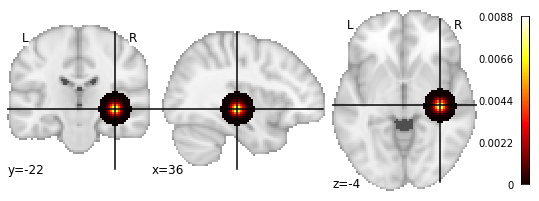

In [312]:
MA_plt_mask = mask.inverse_transform(X[0])
MA_mask_map = plot_stat_map(MA_plt_mask)
plt.show()

#Make sure that the operations went well, retrieve the data of the map by using X 

Separating the data into training data and test (validation) data 

In [313]:
#split the sample to training/test set 
from sklearn.model_selection import train_test_split


X_train1, X_test, y_train1, y_test = train_test_split(
                                                    X, # x
                                                    y, # y
                                                    test_size = 0.25, # 75%25% split 
                                                    random_state = 123, #same shuffle each time 
                                                    shuffle = True, # shuffle dataset before splitting                                                        # before splitting
                                                    stratify = y,# keep
                                                                                  # distribution
                                                                                  # of conditions
                                                                                  # consistent
                                                                                  # betw. train
                                                                                  # & test sets.
                                                                                  )

# print the size of our training and test (validation) groups
print('training:', len(X_train1),
     'testing:', len(X_test))
print (X_train1)

training: 53 testing: 18
[array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 

In [314]:
#Split into training/validation set 
X_train2, X_val, y_train2, y_val = train_test_split(
                                                    X_train1, # x
                                                    y_train1, # y
                                                    test_size = 0.4, # 60%/40% split 
                                                    random_state = 123, #same shuffle each time 
                                                    shuffle = True, # shuffle dataset before splitting                                 
                                                    stratify = y_train1,# keep
                                                                                  # distribution
                                                                                  # of conditions
                                                                                  # consistent
                                                                                  # betw. train
                                                                                  # & test sets.
                                                                                  )

# print the size of our training and test (validation) groups
print('training:', len(X_train2),
     'testing:', len(X_val))

training: 31 testing: 22


In [315]:
# 71 = 31 (training) + 22 (validation) + 18 (testing)

Let's create the model 

In [319]:
from sklearn.svm import SVC

l_svc = SVC(kernel='linear') # define the model

l_svc.fit(X_train2, y_train2) # fit the model

SVC(kernel='linear')

In [320]:
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

import seaborn as sns

accuracy =  0.5454545454545454
MAE =  0.45454545454545453


/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Predicted Conditions')

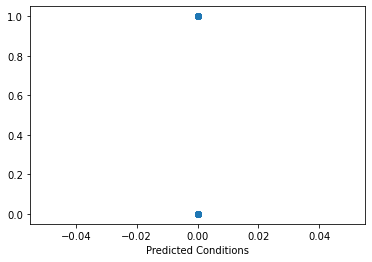

In [321]:
# predict the *validation* data based on the model trained on X_train2
y_pred = l_svc.predict(X_val) 

# caluclate the model accuracy
acc = l_svc.score(X_val, y_val) 
mae = mean_absolute_error(y_true=y_val,y_pred=y_pred)

# print results
print('accuracy = ', acc)
print('MAE = ',mae)

sns.regplot(y_pred,y_val)
plt.xlabel('Predicted Conditions')

Confusion matrix 

In [322]:
from sklearn.metrics import confusion_matrix

matrix_con_val1 = confusion_matrix(y_true = y_val, y_pred = y_pred) 

print(matrix_con_val1)

[[12  0]
 [10  0]]


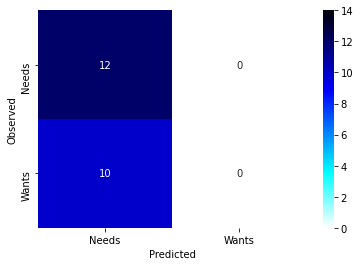

In [380]:
from pandas import DataFrame

cmdf1 = DataFrame(matrix_con_val1, index = ['Needs','Wants'], columns = ['Needs','Wants'])

import seaborn as sns

ax_val1 = sns.heatmap(cmdf1, cmap = "black_blue_r", vmin = 0, vmax = 14, annot = True) #cmap = 'red_transparent_full_alpha_range', center = 8, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Observed')
ax_val1.figure.savefig("Val_Confusion_matrice_1.png")

In [329]:
#Not good...maybe because most of the values are 0 and the non-zero values are still near to 0... 
#Try to change the scale and see 
#exp = np.exp(10*x)-1 

Transform the X data into exponential 

In [330]:
import numpy as np 

In [331]:
X = np.array(X)

In [332]:
X_exp = np.exp(np.array(X)*100)-1

In [333]:
X_exp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [334]:
X_exp[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [335]:
#split the sample to training/test set...again...
from sklearn.model_selection import train_test_split


X_train1, X_test, y_train1, y_test = train_test_split(
                                                    X_exp, # x
                                                    y, # y
                                                    test_size = 0.25, # 75%25% split 
                                                    random_state = 123, #same shuffle each time 
                                                    shuffle = True, # shuffle dataset before splitting                                                        # before splitting
                                                    stratify = y,# keep
                                                                                  # distribution
                                                                                  # of conditions
                                                                                  # consistent
                                                                                  # betw. train
                                                                                  # & test sets.
                                                                                  )

# print the size of our training and test (validation) groups
print('training:', len(X_train1),
     'testing:', len(X_test))
print (X_train1)

training: 53 testing: 18
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [336]:
#Split into training/validation set 
X_train2, X_val, y_train2, y_val = train_test_split(
                                                    X_train1, # x
                                                    y_train1, # y
                                                    test_size = 0.4, # 60%/40% split 
                                                    random_state = 123, #same shuffle each time 
                                                    shuffle = True, # shuffle dataset before splitting                                 
                                                    stratify = y_train1,# keep
                                                                                  # distribution
                                                                                  # of conditions
                                                                                  # consistent
                                                                                  # betw. train
                                                                                  # & test sets.
                                                                                  )

# print the size of our training and test (validation) groups
print('training:', len(X_train2),
     'testing:', len(X_val))

training: 31 testing: 22


In [337]:
from sklearn.svm import SVC

l_svc = SVC(kernel='linear') # define the model

l_svc.fit(X_train2, y_train2) # fit the model

SVC(kernel='linear')

In [338]:
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt

import seaborn as sns

accuracy =  0.8181818181818182
MAE =  0.18181818181818182


/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Predicted Conditions')

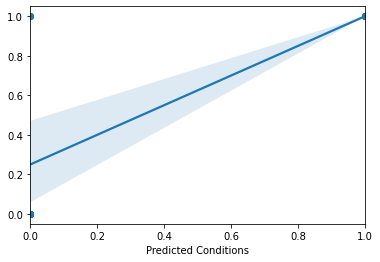

In [339]:
# predict the *validation* data based on the model trained on X_train2
y_pred = l_svc.predict(X_val) 

# caluclate the model accuracy
acc = l_svc.score(X_val, y_val) 
mae = mean_absolute_error(y_true=y_val,y_pred=y_pred)

# print results
print('accuracy = ', acc)
print('MAE = ',mae)

sns.regplot(y_pred,y_val)
plt.xlabel('Predicted Conditions')

In [340]:
matrix_con_val2 = confusion_matrix(y_true = y_val, y_pred = y_pred) 

In [341]:
print(matrix_con_val2)
#12 fois il est à 0 (désir) et il prédit désir (0) (vrais négatifs) 
#4 fois il est à 1 mais il le prédit à 0 (faux négatifs)
#6 fois il est à 1 et il le prédit à 1 (vrais positifs)
#0 fois il est à 0 et il le prédit à 1 (faux positifs)

[[12  0]
 [ 4  6]]


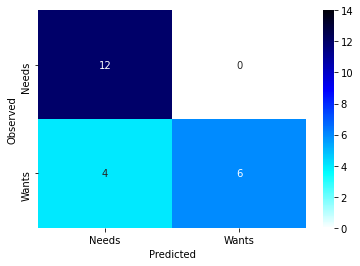

In [379]:
from pandas import DataFrame
cmdf2 = DataFrame(matrix_con_val2, index = ['Needs','Wants'], columns = ['Needs','Wants'])

import seaborn as sns

ax_val2 = sns.heatmap(cmdf2, cmap = "black_blue_r", vmin = 0, vmax = 14, annot = True) #cmap = 'red_transparent_full_alpha_range', center = 8, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Observed')
ax_val2.figure.savefig("Val_Confusion_matrice_2.png")

Retrieve the features which contributes the most to the classification 

In [345]:
l_svc.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.78683124e-12, -1.02621773e-11,  0.00000000e+00]])

In [346]:
coef = np.abs(l_svc.coef_)

In [347]:
coef

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.78683124e-12, 1.02621773e-11, 0.00000000e+00]])

In [348]:
coef.max()

0.03804764741667649

In [349]:
coef.min()

0.0

In [350]:
coef[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       1.78683124e-12, 1.02621773e-11, 0.00000000e+00])

In [351]:
len(coef)

1

In [352]:
len(coef[0]) #chaque voxel a un coeficient de corrélation 

228453

In [353]:
coef[0][1]

0.0

In [354]:
for i in range(len(coef[0])): 
    if coef[0][i]!= 0:
        print(i)

33
34
35
36
46
47
48
49
50
51
62
63
64
65
66
67
68
79
80
81
82
83
84
85
97
98
99
100
101
102
103
104
105
106
119
120
121
122
123
124
125
126
127
128
141
142
143
144
145
146
147
148
155
156
157
158
159
160
161
162
163
164
165
166
167
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
207
208
209
210
211
212
213
214
215
216
217
218
219
220
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
358
359
360
361
362
363
364
365
366
367
368
369
370
371
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
537
538
539
540
541
542
543
544

3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983


7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421


10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
1046

12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13173
13174
13175
13176
13177
13178
13179
13180
13199
13200
13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
13224
13225
13226
13227
13228
13229
1323

15383
15384
15385
15386
15387
15388
15389
15390
15391
15392
15393
15394
15395
15396
15397
15398
15399
15400
15401
15402
15403
15404
15405
15406
15407
15408
15409
15410
15411
15412
15427
15428
15429
15430
15431
15432
15433
15434
15435
15436
15437
15438
15439
15440
15441
15442
15443
15444
15445
15446
15447
15448
15449
15450
15451
15452
15453
15454
15455
15456
15457
15458
15459
15460
15461
15462
15463
15471
15472
15473
15474
15475
15476
15477
15478
15479
15480
15481
15482
15483
15484
15485
15486
15487
15488
15489
15490
15491
15492
15493
15494
15495
15496
15497
15498
15499
15500
15501
15502
15503
15504
15505
15506
15507
15508
15516
15517
15518
15519
15520
15521
15522
15523
15524
15525
15526
15527
15528
15529
15530
15531
15532
15533
15534
15535
15536
15537
15538
15539
15540
15541
15542
15543
15544
15545
15546
15547
15548
15549
15550
15551
15552
15553
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
1558

17967
17968
17969
17970
17971
17972
17973
17974
17978
17979
17980
17981
17982
17983
17984
17985
17986
17987
17988
17989
17990
17991
17992
17993
17994
17995
17996
17997
17998
17999
18000
18001
18002
18003
18004
18005
18006
18007
18008
18009
18021
18022
18023
18024
18025
18026
18027
18028
18029
18030
18031
18032
18034
18035
18036
18037
18038
18039
18040
18041
18042
18043
18044
18045
18046
18047
18048
18049
18050
18051
18052
18053
18054
18055
18056
18057
18058
18059
18060
18061
18062
18063
18064
18065
18077
18078
18079
18080
18081
18082
18083
18084
18085
18086
18087
18088
18090
18091
18092
18093
18094
18095
18096
18097
18098
18099
18100
18101
18102
18103
18104
18105
18106
18107
18108
18109
18110
18111
18112
18113
18114
18115
18116
18117
18118
18119
18120
18121
18133
18134
18135
18136
18137
18138
18139
18140
18141
18142
18143
18144
18145
18146
18147
18148
18149
18150
18151
18152
18153
18154
18155
18156
18157
18158
18159
18160
18161
18162
18163
18164
18165
18166
18167
18168
18169
18170
1817

19599
19600
19601
19602
19603
19604
19605
19606
19607
19608
19609
19610
19611
19612
19613
19614
19615
19616
19617
19618
19619
19620
19621
19622
19623
19624
19625
19626
19627
19628
19629
19630
19631
19632
19633
19634
19635
19636
19637
19638
19639
19640
19641
19642
19643
19644
19645
19646
19647
19648
19649
19650
19651
19652
19653
19654
19655
19656
19657
19658
19659
19660
19661
19662
19663
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
1976

21272
21273
21274
21275
21276
21277
21278
21279
21280
21281
21282
21283
21284
21285
21286
21287
21288
21289
21290
21291
21292
21293
21294
21295
21296
21297
21298
21299
21300
21301
21302
21303
21304
21305
21306
21307
21308
21309
21310
21311
21312
21313
21314
21315
21316
21317
21318
21319
21320
21321
21322
21325
21326
21327
21328
21329
21330
21331
21332
21333
21334
21335
21336
21337
21338
21339
21340
21341
21342
21343
21344
21345
21346
21347
21348
21349
21350
21351
21352
21353
21354
21355
21356
21357
21358
21359
21360
21361
21362
21363
21364
21365
21366
21367
21368
21369
21370
21372
21373
21374
21375
21376
21377
21378
21379
21380
21381
21382
21383
21384
21385
21386
21387
21388
21389
21390
21391
21392
21393
21394
21395
21396
21397
21398
21399
21400
21401
21402
21403
21404
21405
21406
21407
21408
21409
21410
21411
21412
21413
21414
21415
21416
21417
21419
21420
21421
21422
21423
21424
21425
21426
21427
21428
21429
21430
21431
21432
21433
21434
21435
21436
21437
21438
21439
21440
21441
2144

23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23973
23974
23975
23976
23977
23978
23979
23980
23981
23982
23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
23993
23994
23995
23996
23997
23998
23999
24000
24001
24002
24003
24004
24005
24006
24007
24008
24009
24010
24011
24012
24013
24014
24015
24016
24017
24018
24019
24020
24021
24022
24023
24024
24025
24026
24031
24032
24033
24034
24035
24036
24037
24038
24039
24040
24041
24042
24043
24044
24045
24046
24047
24048
24049
24050
24051
24052
24053
24054
24055
24056
24057
24058
24059
24060
24061
24062
24063
24064
24065
24066
24067
24068
24069
24070
24071
24072
24073
24074
24075
24076
24077
24078
24079
24080
24081
24082
24083
24084
24085
24090
24091
24092
24093
24094
24095
24096
24097
24098
24099
24100
24101
24102
24103
24104
24105
24106
24107
24108
24109
24110
24111
24112
24113
24114
24115
24116
24117
24118
24119
24120
24121
24122
24123
24124
24125
24126
24127
24128
24129
2413

26104
26105
26106
26107
26108
26109
26110
26111
26112
26113
26114
26115
26120
26121
26122
26123
26124
26125
26126
26127
26128
26129
26130
26131
26132
26133
26134
26135
26136
26137
26138
26139
26140
26141
26142
26143
26144
26145
26146
26147
26148
26149
26150
26151
26152
26153
26154
26155
26156
26157
26158
26159
26160
26161
26165
26166
26167
26168
26169
26170
26171
26172
26173
26174
26175
26176
26177
26178
26179
26180
26181
26182
26183
26184
26185
26186
26187
26188
26189
26190
26191
26192
26193
26194
26195
26196
26197
26198
26199
26200
26201
26202
26203
26204
26205
26208
26209
26210
26211
26212
26213
26214
26215
26216
26217
26218
26219
26220
26221
26222
26223
26224
26225
26226
26227
26228
26229
26230
26231
26232
26233
26234
26235
26236
26237
26238
26239
26240
26241
26242
26243
26244
26245
26246
26248
26249
26250
26251
26252
26253
26254
26255
26256
26257
26258
26259
26260
26261
26262
26263
26264
26265
26266
26267
26268
26269
26270
26271
26272
26273
26274
26275
26276
26277
26278
26279
2628

28827
28828
28829
28830
28831
28832
28833
28834
28835
28836
28837
28838
28839
28840
28841
28842
28843
28844
28845
28846
28847
28848
28849
28850
28851
28852
28853
28854
28855
28856
28857
28858
28859
28860
28861
28862
28863
28864
28865
28866
28867
28868
28869
28870
28871
28872
28873
28874
28875
28876
28877
28878
28879
28880
28881
28882
28883
28884
28885
28886
28887
28888
28889
28890
28891
28892
28893
28894
28895
28896
28897
28898
28899
28900
28901
28902
28903
28904
28905
28906
28907
28908
28909
28910
28911
28912
28913
28914
28915
28916
28917
28918
28919
28920
28921
28922
28923
28924
28925
28926
28927
28928
28929
28930
28931
28932
28933
28934
28935
28936
28937
28938
28939
28940
28941
28942
28943
28944
28945
28946
28947
28948
28949
28950
28951
28952
28953
28954
28955
28956
28957
28958
28959
28960
28961
28962
28963
28964
28965
28966
28967
28968
28969
28970
28971
28972
28973
28974
28975
28976
28977
28978
28979
28980
28981
28982
28983
28984
28985
28986
28987
28988
28989
28990
28991
28992
2899

30976
30977
30978
30979
30980
30981
30982
30983
30984
30985
30986
30987
30988
30989
30990
30991
30992
30993
30994
30995
30996
30997
30998
30999
31000
31001
31002
31003
31004
31005
31006
31007
31008
31009
31010
31016
31017
31018
31019
31020
31021
31022
31023
31024
31025
31026
31027
31028
31029
31030
31031
31032
31033
31034
31035
31036
31037
31038
31039
31040
31041
31042
31043
31044
31045
31046
31047
31048
31049
31050
31051
31052
31053
31054
31055
31056
31057
31058
31059
31060
31061
31062
31063
31064
31065
31066
31067
31068
31069
31070
31071
31072
31073
31079
31080
31081
31082
31083
31084
31085
31086
31087
31088
31089
31090
31091
31092
31093
31094
31095
31096
31097
31098
31099
31100
31101
31102
31103
31104
31105
31106
31107
31108
31109
31110
31111
31112
31113
31114
31115
31116
31117
31118
31119
31120
31121
31122
31123
31124
31125
31126
31127
31128
31129
31130
31131
31132
31133
31134
31135
31136
31141
31142
31143
31144
31145
31146
31147
31148
31149
31150
31151
31152
31153
31154
31155
3115

33265
33266
33267
33268
33269
33270
33271
33272
33273
33274
33275
33276
33277
33278
33279
33280
33281
33282
33285
33286
33287
33288
33289
33290
33291
33292
33293
33294
33295
33296
33297
33298
33299
33300
33301
33302
33303
33304
33305
33306
33307
33308
33309
33310
33311
33312
33313
33314
33315
33316
33317
33318
33320
33321
33322
33323
33324
33325
33326
33327
33328
33329
33330
33331
33332
33333
33334
33335
33336
33337
33338
33339
33340
33341
33342
33343
33344
33345
33346
33347
33348
33349
33350
33351
33352
33353
33354
33355
33356
33357
33358
33359
33360
33361
33362
33363
33364
33365
33366
33367
33368
33369
33370
33371
33372
33373
33374
33375
33376
33377
33378
33379
33380
33381
33382
33383
33384
33385
33386
33387
33388
33389
33390
33391
33392
33393
33394
33395
33396
33397
33398
33399
33400
33401
33402
33403
33404
33405
33406
33407
33408
33409
33410
33411
33412
33413
33414
33415
33416
33417
33418
33419
33420
33421
33422
33423
33424
33425
33426
33427
33428
33429
33430
33431
33432
33433
3343

35719
35720
35721
35722
35723
35724
35725
35726
35727
35728
35729
35730
35731
35732
35733
35734
35735
35736
35737
35738
35739
35740
35741
35742
35743
35744
35745
35746
35747
35748
35749
35750
35751
35752
35753
35754
35755
35756
35757
35758
35759
35760
35761
35762
35763
35764
35765
35766
35767
35768
35769
35770
35771
35772
35773
35774
35775
35776
35777
35778
35779
35780
35781
35782
35783
35784
35785
35786
35787
35788
35789
35790
35791
35792
35793
35794
35795
35796
35797
35798
35799
35800
35801
35802
35803
35804
35805
35806
35807
35808
35809
35810
35811
35812
35813
35814
35815
35816
35817
35818
35819
35820
35821
35822
35823
35824
35825
35826
35827
35828
35829
35830
35831
35832
35833
35834
35835
35836
35837
35838
35839
35840
35841
35842
35843
35844
35845
35846
35847
35848
35849
35850
35851
35852
35853
35854
35855
35856
35857
35858
35859
35860
35861
35862
35863
35864
35865
35866
35867
35868
35869
35870
35871
35872
35873
35874
35875
35876
35877
35878
35879
35880
35881
35882
35883
35884
3588

38171
38172
38173
38174
38175
38176
38177
38178
38179
38180
38181
38182
38183
38184
38185
38186
38187
38188
38189
38190
38191
38192
38193
38194
38195
38196
38197
38198
38199
38200
38201
38202
38203
38204
38205
38206
38207
38208
38209
38210
38211
38212
38213
38214
38215
38216
38217
38224
38225
38226
38227
38228
38229
38230
38231
38232
38233
38234
38235
38236
38237
38238
38239
38240
38241
38242
38243
38244
38245
38246
38247
38248
38249
38250
38251
38252
38253
38254
38255
38256
38257
38258
38259
38260
38261
38262
38263
38264
38265
38266
38267
38268
38269
38270
38271
38272
38273
38274
38275
38276
38277
38278
38279
38280
38287
38288
38289
38290
38291
38292
38293
38294
38295
38296
38297
38298
38299
38300
38301
38302
38303
38304
38305
38306
38307
38308
38309
38310
38311
38312
38313
38314
38315
38316
38317
38318
38319
38320
38321
38322
38323
38324
38325
38326
38327
38328
38329
38330
38331
38332
38333
38334
38335
38336
38337
38338
38339
38340
38341
38342
38343
38344
38351
38352
38353
38354
3835

40437
40438
40439
40440
40441
40442
40443
40444
40445
40446
40447
40448
40449
40450
40451
40452
40453
40454
40455
40456
40457
40458
40459
40460
40461
40462
40463
40464
40465
40466
40467
40468
40469
40470
40471
40472
40473
40474
40475
40476
40477
40478
40479
40480
40481
40482
40483
40484
40485
40486
40487
40488
40489
40490
40491
40492
40493
40494
40495
40496
40497
40498
40499
40500
40501
40502
40503
40504
40505
40506
40507
40508
40509
40510
40511
40512
40513
40514
40515
40516
40517
40518
40519
40520
40521
40522
40523
40524
40525
40526
40527
40535
40536
40537
40538
40539
40540
40541
40542
40543
40544
40545
40546
40547
40548
40549
40550
40551
40552
40553
40554
40555
40556
40557
40558
40559
40560
40561
40562
40563
40564
40565
40566
40567
40568
40569
40570
40571
40572
40573
40574
40575
40576
40577
40578
40579
40586
40587
40588
40589
40590
40591
40592
40593
40594
40595
40596
40597
40598
40599
40600
40601
40602
40603
40604
40605
40606
40607
40608
40609
40610
40611
40612
40613
40614
40615
4061

42913
42914
42915
42916
42917
42918
42919
42920
42921
42922
42923
42924
42925
42926
42927
42928
42929
42930
42931
42932
42933
42934
42935
42940
42941
42942
42943
42944
42945
42946
42947
42948
42949
42950
42951
42952
42953
42954
42955
42956
42957
42958
42959
42960
42961
42962
42963
42964
42965
42966
42967
42968
42969
42970
42971
42972
42973
42974
42975
42976
42977
42978
42979
42980
42981
42982
42983
42984
42985
42986
42987
42992
42993
42994
42995
42996
42997
42998
42999
43000
43001
43002
43003
43004
43005
43006
43007
43008
43009
43010
43011
43012
43013
43014
43015
43016
43017
43018
43019
43020
43021
43022
43023
43024
43025
43026
43027
43028
43029
43030
43031
43032
43033
43034
43035
43036
43037
43038
43039
43047
43048
43049
43050
43051
43052
43053
43054
43055
43056
43057
43058
43059
43060
43061
43062
43063
43064
43065
43066
43067
43068
43069
43070
43071
43072
43073
43074
43075
43076
43077
43078
43079
43080
43081
43082
43083
43084
43085
43086
43087
43088
43089
43090
43091
43094
43095
4309

44338
44339
44340
44341
44342
44343
44344
44345
44346
44347
44348
44349
44350
44351
44352
44353
44354
44355
44356
44357
44358
44359
44360
44361
44362
44363
44364
44365
44366
44367
44368
44369
44370
44371
44372
44373
44374
44375
44376
44377
44378
44379
44380
44381
44382
44383
44384
44385
44386
44387
44388
44389
44390
44391
44392
44393
44394
44395
44396
44397
44398
44399
44400
44401
44402
44403
44404
44405
44406
44407
44415
44416
44417
44418
44419
44420
44421
44422
44423
44424
44425
44426
44427
44428
44429
44430
44431
44432
44433
44434
44435
44436
44437
44438
44439
44440
44441
44442
44443
44444
44445
44446
44447
44448
44449
44450
44451
44452
44453
44454
44455
44456
44457
44458
44459
44467
44468
44469
44470
44471
44472
44473
44474
44475
44476
44477
44478
44479
44480
44481
44482
44483
44484
44485
44486
44487
44488
44489
44490
44491
44492
44493
44494
44495
44496
44497
44498
44499
44500
44501
44502
44503
44504
44505
44506
44507
44508
44509
44510
44517
44518
44519
44520
44521
44522
44523
4452

47155
47156
47157
47158
47159
47160
47161
47162
47163
47164
47165
47166
47167
47168
47169
47173
47174
47175
47176
47177
47178
47179
47180
47181
47182
47183
47184
47185
47186
47187
47188
47189
47190
47191
47192
47193
47194
47195
47196
47197
47198
47199
47200
47201
47202
47203
47204
47205
47206
47207
47208
47209
47210
47211
47212
47213
47214
47215
47216
47217
47218
47219
47220
47221
47222
47223
47228
47229
47230
47231
47232
47233
47234
47235
47236
47237
47238
47239
47240
47241
47242
47243
47244
47245
47246
47247
47248
47249
47250
47251
47252
47253
47254
47255
47256
47257
47258
47259
47260
47261
47262
47263
47264
47265
47266
47267
47268
47269
47270
47271
47272
47273
47274
47275
47276
47277
47278
47279
47283
47284
47285
47286
47287
47288
47289
47290
47291
47292
47293
47294
47295
47296
47297
47298
47299
47300
47301
47302
47303
47304
47305
47306
47307
47308
47309
47310
47311
47312
47313
47314
47315
47316
47317
47318
47319
47320
47321
47322
47323
47324
47325
47326
47327
47328
47329
47330
4733

49646
49647
49648
49649
49650
49669
49670
49671
49672
49673
49674
49675
49676
49677
49678
49679
49680
49681
49682
49683
49684
49685
49686
49687
49688
49689
49690
49691
49692
49693
49694
49695
49696
49697
49698
49699
49700
49701
49702
49703
49704
49705
49706
49707
49708
49709
49730
49731
49732
49733
49734
49735
49736
49737
49738
49739
49740
49741
49742
49743
49744
49745
49746
49747
49748
49749
49750
49751
49752
49753
49754
49755
49756
49757
49758
49759
49760
49761
49762
49763
49764
49765
49766
49767
49768
49769
49770
49771
49772
49773
49774
49775
49776
49777
49778
49779
49780
49781
49782
49791
49792
49793
49794
49795
49796
49797
49798
49799
49800
49801
49802
49803
49804
49805
49806
49807
49808
49809
49810
49811
49812
49813
49814
49815
49816
49817
49818
49819
49820
49821
49822
49823
49824
49825
49826
49827
49828
49829
49830
49831
49832
49833
49834
49835
49836
49837
49838
49839
49840
49841
49842
49843
49844
49854
49855
49856
49857
49858
49859
49860
49861
49862
49863
49864
49865
49866
4986

52397
52398
52399
52400
52401
52402
52403
52404
52405
52406
52407
52408
52409
52410
52411
52412
52413
52414
52415
52416
52424
52425
52426
52427
52428
52429
52430
52431
52432
52433
52434
52435
52436
52437
52438
52439
52440
52441
52442
52443
52444
52445
52446
52447
52448
52449
52450
52451
52452
52453
52454
52455
52456
52457
52458
52459
52460
52461
52462
52463
52464
52465
52466
52467
52468
52476
52477
52478
52479
52480
52481
52482
52483
52484
52485
52486
52487
52488
52489
52490
52491
52492
52493
52494
52495
52496
52497
52498
52499
52500
52501
52502
52503
52504
52505
52506
52507
52508
52509
52510
52511
52512
52513
52514
52515
52516
52517
52518
52526
52527
52528
52529
52530
52531
52532
52533
52534
52535
52536
52537
52538
52539
52540
52541
52542
52543
52544
52545
52546
52547
52548
52549
52550
52551
52552
52553
52554
52555
52556
52557
52558
52559
52560
52561
52562
52563
52564
52571
52572
52573
52574
52575
52576
52577
52578
52579
52580
52581
52582
52583
52584
52585
52586
52587
52588
52589
5259

55094
55095
55096
55097
55098
55099
55100
55101
55102
55103
55104
55105
55106
55107
55108
55109
55110
55111
55112
55113
55114
55115
55116
55117
55118
55119
55120
55121
55122
55123
55124
55125
55126
55127
55128
55129
55130
55131
55132
55133
55134
55135
55136
55137
55144
55145
55146
55147
55148
55149
55150
55151
55152
55153
55154
55155
55156
55157
55158
55159
55160
55161
55162
55163
55164
55165
55166
55167
55168
55169
55170
55171
55172
55173
55174
55175
55176
55177
55178
55179
55180
55181
55182
55183
55184
55185
55186
55187
55188
55189
55190
55191
55193
55194
55195
55196
55197
55198
55199
55200
55201
55202
55203
55204
55205
55206
55207
55208
55209
55210
55211
55212
55213
55214
55215
55216
55217
55218
55219
55220
55221
55222
55223
55224
55225
55226
55227
55228
55229
55230
55231
55232
55233
55234
55235
55236
55237
55238
55239
55240
55241
55242
55243
55244
55245
55247
55248
55249
55250
55251
55252
55253
55254
55255
55256
55257
55258
55259
55260
55261
55262
55263
55264
55265
55266
55267
5526

57615
57616
57617
57618
57619
57620
57621
57622
57623
57624
57625
57626
57627
57628
57629
57630
57631
57632
57633
57634
57635
57636
57637
57658
57659
57660
57661
57662
57663
57664
57665
57666
57667
57668
57669
57670
57671
57672
57673
57674
57675
57676
57677
57678
57679
57680
57681
57682
57683
57684
57685
57686
57687
57688
57689
57703
57704
57705
57706
57707
57708
57709
57710
57711
57712
57713
57714
57715
57716
57717
57718
57719
57720
57721
57722
57723
57724
57725
57726
57727
57728
57729
57730
57731
57732
57733
57734
57735
57736
57737
57738
57739
57740
57741
57742
57743
57759
57760
57761
57762
57763
57764
57765
57766
57767
57768
57769
57770
57771
57772
57773
57774
57775
57776
57777
57778
57779
57780
57781
57782
57783
57784
57785
57786
57787
57788
57789
57790
57791
57792
57793
57794
57795
57796
57797
57798
57799
57816
57817
57818
57819
57820
57821
57822
57823
57824
57825
57826
57827
57828
57829
57830
57831
57832
57833
57834
57835
57836
57837
57838
57839
57840
57841
57842
57843
57844
5784

59572
59573
59574
59575
59576
59577
59578
59579
59580
59581
59582
59583
59584
59585
59586
59587
59588
59589
59590
59591
59592
59593
59594
59595
59596
59597
59598
59599
59600
59601
59602
59603
59604
59605
59606
59612
59613
59614
59615
59616
59617
59618
59619
59620
59621
59622
59623
59624
59625
59626
59627
59628
59629
59630
59631
59632
59633
59634
59635
59636
59637
59638
59639
59640
59641
59642
59643
59644
59645
59646
59647
59648
59649
59650
59651
59652
59653
59654
59655
59656
59657
59658
59659
59660
59661
59662
59668
59669
59670
59671
59672
59673
59674
59675
59676
59677
59678
59679
59680
59681
59682
59683
59684
59685
59686
59687
59688
59689
59690
59691
59692
59693
59694
59695
59696
59697
59698
59699
59700
59701
59702
59703
59704
59705
59706
59707
59708
59709
59710
59711
59712
59713
59714
59715
59716
59717
59718
59719
59724
59725
59726
59727
59728
59729
59730
59731
59732
59733
59734
59735
59736
59737
59738
59739
59740
59741
59742
59743
59744
59745
59746
59747
59748
59749
59750
59751
5975

62103
62104
62111
62112
62113
62114
62115
62116
62117
62118
62119
62120
62121
62122
62123
62124
62125
62126
62127
62128
62129
62130
62131
62132
62133
62134
62135
62136
62137
62138
62139
62140
62141
62142
62143
62144
62145
62146
62147
62148
62149
62150
62151
62157
62158
62159
62160
62161
62162
62163
62164
62165
62173
62174
62175
62176
62177
62178
62179
62180
62181
62182
62183
62184
62185
62186
62187
62188
62189
62190
62191
62192
62193
62194
62195
62196
62197
62198
62199
62200
62201
62202
62203
62204
62205
62206
62207
62208
62209
62210
62211
62212
62213
62219
62220
62221
62222
62223
62224
62225
62226
62227
62228
62236
62237
62238
62239
62240
62241
62242
62243
62244
62245
62246
62247
62248
62249
62250
62251
62252
62253
62254
62255
62256
62257
62258
62259
62260
62261
62262
62263
62264
62265
62266
62267
62268
62269
62270
62271
62272
62273
62274
62275
62276
62277
62278
62279
62280
62281
62282
62283
62284
62285
62286
62287
62288
62289
62290
62291
62292
62299
62300
62301
62302
62303
62304
6230

64127
64128
64129
64130
64131
64132
64133
64134
64135
64136
64137
64138
64139
64140
64141
64142
64143
64144
64145
64146
64147
64152
64153
64154
64155
64156
64157
64158
64159
64160
64161
64162
64163
64164
64165
64166
64167
64168
64169
64170
64171
64172
64173
64174
64175
64176
64177
64178
64179
64180
64181
64182
64183
64184
64185
64186
64187
64188
64189
64190
64191
64192
64193
64194
64195
64196
64197
64198
64199
64200
64201
64202
64203
64204
64205
64206
64207
64208
64209
64214
64215
64216
64217
64218
64219
64220
64221
64222
64223
64224
64225
64226
64227
64228
64229
64230
64231
64232
64233
64234
64235
64236
64237
64238
64239
64240
64241
64242
64243
64244
64245
64246
64247
64248
64249
64250
64251
64252
64253
64254
64255
64256
64257
64258
64259
64260
64261
64262
64263
64264
64265
64266
64267
64268
64269
64270
64271
64272
64277
64278
64279
64280
64281
64282
64283
64284
64285
64286
64287
64288
64289
64290
64291
64292
64293
64294
64295
64296
64297
64298
64299
64300
64301
64302
64303
64304
6430

65689
65690
65691
65692
65693
65694
65695
65696
65697
65698
65699
65700
65701
65702
65703
65704
65705
65706
65707
65708
65709
65710
65711
65712
65713
65714
65715
65716
65717
65718
65719
65720
65721
65722
65723
65724
65725
65726
65727
65728
65729
65730
65731
65732
65733
65734
65735
65736
65737
65738
65739
65740
65741
65742
65743
65744
65745
65746
65747
65748
65749
65750
65751
65752
65753
65754
65755
65756
65757
65758
65759
65760
65761
65762
65763
65764
65765
65766
65767
65768
65769
65770
65771
65772
65773
65774
65775
65776
65777
65778
65779
65780
65781
65782
65783
65784
65785
65786
65787
65788
65789
65790
65791
65792
65793
65794
65795
65796
65797
65798
65799
65800
65801
65802
65803
65804
65805
65806
65807
65808
65809
65810
65811
65812
65813
65814
65815
65816
65817
65818
65819
65820
65821
65822
65823
65824
65825
65826
65827
65828
65829
65830
65831
65832
65833
65834
65835
65836
65837
65838
65839
65840
65841
65842
65843
65844
65845
65846
65847
65848
65849
65850
65851
65852
65853
65854
6585

68240
68241
68242
68243
68244
68245
68246
68247
68248
68249
68250
68251
68252
68253
68254
68255
68256
68257
68263
68264
68265
68266
68267
68268
68269
68270
68271
68272
68273
68274
68275
68276
68277
68278
68279
68280
68281
68282
68283
68284
68285
68286
68287
68288
68289
68290
68291
68292
68293
68294
68295
68296
68297
68298
68299
68300
68301
68302
68303
68304
68305
68306
68307
68308
68309
68310
68311
68312
68313
68314
68315
68321
68322
68323
68324
68325
68326
68327
68328
68329
68330
68331
68332
68333
68334
68335
68336
68337
68338
68339
68340
68341
68342
68343
68344
68345
68346
68347
68348
68349
68350
68351
68352
68353
68354
68355
68356
68357
68358
68359
68360
68361
68362
68363
68364
68365
68366
68367
68368
68369
68370
68371
68372
68373
68374
68375
68376
68377
68378
68379
68382
68383
68384
68385
68386
68387
68388
68389
68390
68391
68392
68393
68394
68395
68396
68397
68398
68399
68400
68401
68402
68403
68404
68405
68406
68407
68408
68409
68410
68411
68412
68413
68414
68415
68416
68417
6841

70645
70646
70647
70657
70658
70659
70660
70661
70662
70663
70664
70665
70666
70667
70668
70669
70670
70671
70672
70673
70674
70675
70676
70677
70678
70679
70680
70681
70682
70683
70684
70685
70686
70687
70688
70689
70690
70691
70692
70693
70694
70695
70696
70697
70698
70699
70700
70701
70702
70703
70704
70705
70706
70707
70708
70709
70710
70711
70718
70719
70720
70721
70722
70723
70724
70725
70726
70727
70728
70729
70730
70731
70732
70733
70734
70735
70736
70737
70738
70739
70740
70741
70742
70743
70744
70745
70746
70747
70748
70749
70750
70751
70752
70753
70754
70755
70756
70757
70758
70759
70760
70761
70762
70763
70764
70765
70766
70767
70768
70769
70770
70771
70772
70773
70780
70781
70782
70783
70784
70785
70786
70787
70788
70789
70790
70791
70792
70793
70794
70795
70796
70797
70798
70799
70800
70801
70802
70803
70804
70805
70806
70807
70808
70809
70810
70811
70812
70813
70814
70815
70816
70817
70818
70819
70820
70821
70822
70823
70824
70825
70826
70827
70828
70829
70830
70831
7083

72870
72871
72872
72873
72874
72875
72876
72877
72878
72879
72880
72881
72882
72883
72884
72885
72886
72887
72888
72889
72890
72891
72892
72893
72894
72895
72896
72897
72898
72899
72900
72901
72902
72903
72904
72905
72906
72907
72908
72909
72910
72911
72912
72913
72915
72916
72917
72918
72919
72920
72921
72922
72923
72924
72925
72926
72927
72928
72929
72930
72931
72932
72933
72934
72935
72936
72937
72938
72939
72940
72941
72942
72943
72944
72945
72946
72947
72948
72949
72950
72951
72952
72953
72954
72955
72956
72957
72958
72959
72960
72961
72962
72963
72964
72965
72966
72967
72968
72969
72970
72971
72972
72973
72974
72975
72977
72978
72979
72980
72981
72982
72983
72984
72985
72986
72987
72988
72989
72990
72991
72992
72993
72994
72995
72996
72997
72998
72999
73000
73001
73002
73003
73004
73005
73006
73007
73008
73009
73010
73011
73012
73013
73014
73015
73016
73017
73018
73019
73020
73021
73022
73023
73024
73025
73026
73027
73028
73029
73030
73031
73032
73033
73034
73035
73036
73038
7303

75030
75031
75032
75033
75034
75035
75036
75037
75038
75039
75040
75041
75042
75043
75044
75045
75046
75047
75048
75049
75050
75051
75052
75053
75054
75055
75056
75057
75058
75059
75060
75061
75062
75063
75064
75065
75066
75067
75068
75069
75076
75077
75078
75079
75080
75081
75082
75083
75084
75085
75086
75087
75088
75089
75090
75091
75092
75093
75094
75095
75096
75097
75098
75099
75100
75101
75102
75103
75104
75105
75106
75107
75108
75109
75110
75111
75112
75113
75114
75115
75116
75117
75118
75119
75120
75121
75122
75123
75124
75125
75126
75127
75128
75129
75130
75131
75138
75139
75140
75141
75142
75143
75144
75145
75146
75147
75148
75149
75150
75151
75152
75153
75154
75155
75156
75157
75158
75159
75160
75161
75162
75163
75164
75165
75166
75167
75168
75169
75170
75171
75172
75173
75174
75175
75176
75177
75178
75179
75180
75181
75182
75183
75184
75185
75186
75187
75188
75189
75190
75191
75192
75193
75194
75199
75200
75201
75202
75203
75204
75205
75206
75207
75208
75209
75210
75211
7521

78100
78101
78102
78103
78104
78105
78106
78107
78108
78109
78110
78111
78112
78113
78114
78115
78117
78118
78119
78120
78121
78122
78123
78124
78125
78126
78127
78128
78129
78130
78131
78132
78133
78134
78135
78136
78137
78138
78139
78140
78141
78142
78143
78144
78145
78146
78147
78148
78149
78150
78151
78152
78153
78154
78155
78156
78157
78158
78159
78161
78162
78163
78164
78165
78166
78167
78168
78169
78170
78171
78172
78173
78174
78175
78176
78177
78178
78179
78180
78181
78182
78183
78184
78185
78186
78187
78188
78189
78190
78191
78192
78193
78194
78195
78196
78197
78198
78199
78200
78201
78202
78203
78204
78205
78206
78207
78208
78209
78210
78211
78212
78213
78214
78215
78216
78217
78218
78219
78220
78221
78222
78223
78224
78225
78226
78227
78228
78229
78230
78231
78232
78233
78234
78235
78236
78237
78238
78239
78240
78241
78242
78243
78244
78245
78246
78247
78248
78249
78250
78251
78252
78253
78254
78255
78256
78257
78258
78259
78260
78261
78262
78263
78264
78265
78266
78267
7826

80657
80658
80659
80660
80661
80662
80663
80664
80665
80666
80667
80668
80669
80672
80673
80674
80675
80676
80677
80678
80679
80680
80681
80682
80683
80684
80685
80686
80687
80688
80689
80690
80691
80692
80693
80694
80695
80696
80697
80698
80699
80700
80701
80702
80703
80704
80705
80706
80707
80708
80709
80710
80711
80712
80713
80714
80715
80716
80717
80718
80719
80720
80721
80722
80723
80724
80725
80726
80727
80728
80729
80730
80731
80732
80733
80740
80741
80742
80743
80744
80745
80746
80747
80748
80749
80750
80751
80752
80753
80754
80755
80756
80757
80758
80759
80760
80761
80762
80763
80764
80765
80766
80767
80768
80769
80770
80771
80772
80773
80774
80775
80776
80777
80778
80779
80780
80781
80782
80783
80784
80785
80786
80787
80788
80789
80790
80791
80792
80793
80794
80795
80801
80802
80803
80804
80805
80806
80807
80808
80809
80810
80811
80812
80813
80814
80815
80816
80817
80818
80819
80820
80821
80822
80823
80824
80825
80826
80827
80828
80829
80830
80831
80832
80833
80834
80835
8083

82905
82906
82907
82908
82909
82910
82911
82912
82913
82914
82915
82916
82917
82918
82919
82920
82921
82922
82923
82924
82925
82926
82927
82928
82929
82930
82931
82932
82939
82940
82941
82942
82943
82944
82945
82946
82947
82948
82949
82950
82951
82952
82953
82954
82955
82956
82957
82958
82959
82960
82961
82962
82963
82964
82965
82966
82967
82973
82974
82975
82976
82977
82978
82979
82980
82981
82982
82983
82984
82985
82986
82987
82988
82989
82990
82991
82992
82993
82994
82995
82996
82997
82998
82999
83000
83001
83007
83008
83009
83010
83011
83012
83013
83014
83015
83016
83017
83018
83019
83020
83021
83022
83023
83024
83025
83026
83027
83028
83029
83030
83031
83032
83033
83034
83035
83040
83041
83042
83043
83044
83045
83046
83047
83048
83049
83050
83051
83052
83053
83054
83055
83056
83057
83058
83059
83060
83061
83062
83063
83064
83065
83066
83067
83070
83071
83072
83073
83074
83075
83076
83077
83078
83079
83080
83081
83082
83083
83084
83085
83086
83087
83088
83089
83090
83091
83092
8309

84534
84535
84536
84537
84538
84539
84540
84541
84542
84543
84544
84545
84546
84547
84548
84549
84550
84551
84552
84553
84554
84555
84556
84557
84565
84566
84567
84568
84569
84570
84571
84572
84573
84574
84575
84576
84577
84578
84579
84580
84581
84582
84583
84584
84585
84586
84587
84588
84589
84590
84591
84592
84593
84594
84595
84596
84597
84598
84599
84600
84601
84602
84603
84604
84605
84606
84607
84608
84609
84610
84611
84612
84613
84614
84615
84616
84617
84618
84619
84620
84621
84622
84623
84624
84625
84626
84627
84628
84629
84637
84638
84639
84640
84641
84642
84643
84644
84645
84646
84647
84648
84649
84650
84651
84652
84653
84654
84655
84656
84657
84658
84659
84660
84661
84662
84663
84664
84665
84666
84667
84668
84669
84670
84671
84672
84673
84674
84675
84676
84677
84678
84679
84680
84681
84682
84683
84684
84685
84686
84687
84688
84689
84690
84691
84692
84693
84694
84695
84696
84697
84698
84699
84700
84701
84709
84710
84711
84712
84713
84714
84715
84716
84717
84718
84719
84720
8472

86921
86922
86923
86924
86925
86926
86927
86928
86929
86930
86931
86932
86933
86934
86935
86936
86937
86938
86939
86940
86941
86942
86943
86944
86945
86946
86947
86948
86949
86950
86951
86952
86953
86954
86955
86956
86957
86958
86959
86960
86961
86962
86963
86964
86965
86966
86967
86968
86969
86970
86971
86972
86973
86974
86975
86976
86977
86978
86979
86980
86981
86982
86983
86984
86985
86986
86987
86988
86989
86990
86991
86992
86993
86994
86995
86996
86997
86998
86999
87000
87001
87002
87003
87004
87005
87006
87007
87008
87009
87010
87011
87012
87013
87014
87015
87016
87017
87018
87019
87020
87021
87022
87023
87024
87025
87026
87027
87028
87029
87030
87031
87032
87033
87034
87035
87036
87037
87038
87039
87040
87041
87042
87043
87044
87045
87046
87048
87049
87050
87051
87052
87053
87054
87055
87056
87057
87058
87059
87060
87061
87062
87063
87064
87065
87066
87067
87068
87069
87070
87071
87072
87073
87074
87075
87076
87077
87078
87079
87080
87081
87082
87083
87084
87085
87086
87087
8708

89472
89473
89474
89475
89476
89477
89478
89479
89480
89481
89482
89483
89484
89485
89486
89487
89488
89489
89490
89491
89492
89493
89494
89495
89496
89497
89498
89499
89500
89501
89502
89503
89504
89505
89506
89507
89508
89509
89510
89511
89512
89513
89519
89520
89521
89522
89523
89524
89525
89526
89527
89528
89529
89530
89531
89532
89533
89534
89535
89536
89537
89538
89539
89540
89541
89542
89543
89544
89545
89546
89547
89548
89549
89550
89551
89552
89553
89554
89555
89556
89557
89558
89559
89560
89561
89562
89563
89564
89565
89566
89567
89568
89569
89570
89571
89572
89573
89574
89575
89576
89583
89584
89585
89586
89587
89588
89589
89590
89591
89592
89593
89594
89595
89596
89597
89598
89599
89600
89601
89602
89603
89604
89605
89606
89607
89608
89609
89610
89611
89612
89613
89614
89615
89616
89617
89618
89619
89620
89621
89622
89623
89624
89625
89626
89627
89628
89629
89630
89631
89632
89633
89634
89635
89636
89637
89638
89639
89640
89647
89648
89649
89650
89651
89652
89653
89654
8965

91828
91829
91830
91831
91838
91839
91840
91841
91842
91843
91844
91845
91846
91847
91848
91849
91850
91851
91852
91853
91854
91855
91856
91857
91858
91859
91860
91861
91862
91863
91864
91865
91866
91867
91873
91874
91875
91876
91877
91878
91879
91880
91881
91882
91883
91884
91885
91886
91887
91888
91889
91890
91891
91892
91893
91894
91895
91896
91897
91898
91899
91900
91901
91902
91906
91907
91908
91909
91910
91911
91912
91913
91914
91915
91916
91917
91918
91919
91920
91921
91922
91923
91924
91925
91926
91927
91928
91929
91930
91931
91932
91933
91934
91935
91938
91939
91940
91941
91942
91943
91944
91945
91946
91947
91948
91949
91950
91951
91952
91953
91954
91955
91956
91957
91958
91959
91960
91961
91962
91963
91964
91965
91966
91967
91968
91969
91970
91971
91972
91973
91974
91975
91976
91977
91978
91979
91980
91981
91982
91983
91984
91985
91986
91987
91988
91989
91990
91991
91992
91993
91994
91995
91996
91997
91998
91999
92000
92001
92002
92003
92004
92005
92006
92007
92008
92009
9201

93824
93825
93826
93827
93828
93829
93830
93831
93832
93833
93834
93835
93836
93837
93838
93839
93840
93841
93842
93843
93844
93845
93846
93847
93848
93849
93850
93851
93852
93853
93854
93855
93856
93857
93858
93859
93860
93868
93869
93870
93871
93872
93873
93874
93875
93876
93877
93878
93879
93880
93881
93882
93883
93884
93885
93886
93887
93888
93889
93890
93891
93892
93893
93894
93895
93896
93897
93898
93899
93900
93901
93902
93903
93904
93905
93906
93907
93908
93909
93910
93911
93912
93913
93914
93915
93916
93917
93918
93919
93920
93921
93922
93923
93924
93925
93926
93927
93928
93929
93930
93942
93943
93944
93945
93946
93947
93948
93949
93950
93951
93952
93953
93954
93955
93956
93957
93958
93959
93960
93961
93962
93963
93964
93965
93966
93967
93968
93969
93970
93971
93972
93973
93974
93975
93976
93977
93978
93979
93980
93981
93982
93983
93984
93985
93986
93987
93988
93989
93990
93991
93992
93993
93994
93995
93996
93997
93998
93999
94006
94007
94008
94009
94010
94011
94012
94013
9401

95762
95763
95764
95765
95766
95767
95768
95769
95770
95771
95772
95773
95774
95775
95776
95777
95778
95779
95780
95781
95782
95783
95784
95785
95786
95787
95788
95789
95790
95791
95792
95793
95794
95795
95796
95797
95798
95799
95800
95801
95802
95803
95804
95805
95806
95807
95808
95809
95810
95811
95812
95813
95814
95815
95816
95817
95818
95819
95820
95821
95822
95823
95824
95825
95826
95827
95828
95829
95830
95831
95832
95833
95834
95835
95836
95837
95838
95839
95840
95841
95842
95843
95844
95845
95846
95847
95848
95849
95850
95851
95852
95853
95854
95855
95856
95857
95858
95859
95860
95861
95862
95863
95864
95865
95866
95867
95868
95869
95870
95871
95872
95873
95874
95875
95876
95877
95878
95879
95880
95881
95882
95883
95884
95885
95886
95887
95888
95889
95890
95891
95892
95893
95894
95895
95896
95897
95898
95899
95900
95901
95902
95903
95904
95905
95906
95907
95908
95909
95910
95911
95912
95913
95914
95915
95916
95917
95918
95919
95920
95921
95922
95923
95924
95925
95926
95927
9592

98150
98151
98152
98153
98154
98155
98156
98157
98158
98159
98160
98161
98162
98163
98164
98165
98173
98174
98175
98176
98177
98178
98179
98180
98181
98182
98183
98184
98185
98186
98187
98188
98189
98190
98191
98192
98193
98194
98195
98196
98197
98198
98199
98200
98201
98202
98203
98204
98205
98206
98207
98208
98209
98210
98211
98212
98213
98214
98215
98216
98217
98218
98219
98220
98221
98222
98223
98224
98225
98226
98227
98228
98229
98230
98231
98232
98233
98234
98241
98242
98243
98244
98245
98246
98247
98248
98249
98250
98251
98252
98253
98254
98255
98256
98257
98258
98259
98260
98261
98262
98263
98264
98265
98266
98267
98268
98269
98270
98271
98272
98273
98274
98275
98276
98277
98278
98279
98280
98281
98282
98283
98284
98285
98286
98287
98288
98289
98290
98291
98292
98293
98294
98295
98296
98297
98298
98299
98312
98313
98314
98315
98316
98317
98318
98319
98320
98321
98322
98323
98324
98325
98326
98327
98328
98329
98330
98331
98332
98333
98334
98335
98336
98337
98338
98339
98340
9834

100471
100472
100473
100474
100475
100476
100477
100478
100479
100480
100481
100482
100483
100484
100485
100486
100487
100488
100489
100490
100491
100492
100493
100494
100495
100496
100497
100498
100499
100500
100501
100502
100510
100511
100512
100513
100514
100515
100516
100517
100518
100519
100520
100521
100522
100523
100524
100525
100526
100527
100528
100529
100530
100531
100532
100533
100534
100535
100536
100537
100538
100539
100540
100541
100542
100549
100550
100551
100552
100553
100554
100555
100556
100557
100558
100559
100560
100561
100562
100563
100564
100565
100566
100567
100568
100569
100570
100571
100572
100573
100574
100575
100576
100577
100578
100579
100580
100587
100588
100589
100590
100591
100592
100593
100594
100595
100596
100597
100598
100599
100600
100601
100602
100603
100604
100605
100606
100607
100608
100609
100610
100611
100612
100613
100614
100615
100616
100617
100618
100624
100625
100626
100627
100628
100629
100630
100631
100632
100633
100634
100635
100636
100637

102800
102801
102802
102803
102804
102805
102806
102807
102808
102809
102810
102811
102812
102813
102814
102815
102816
102817
102818
102819
102820
102821
102822
102823
102824
102825
102826
102827
102828
102829
102830
102831
102832
102833
102834
102835
102836
102837
102838
102839
102846
102847
102848
102849
102850
102851
102852
102853
102854
102855
102856
102857
102858
102859
102860
102861
102862
102863
102864
102865
102866
102867
102868
102869
102870
102871
102872
102873
102874
102875
102876
102877
102878
102879
102880
102881
102882
102883
102884
102885
102886
102887
102888
102889
102890
102891
102892
102893
102894
102895
102896
102897
102898
102899
102900
102901
102902
102903
102910
102911
102912
102913
102914
102915
102916
102917
102918
102919
102920
102921
102922
102923
102924
102925
102926
102927
102928
102929
102930
102931
102932
102933
102934
102935
102936
102937
102938
102939
102940
102941
102942
102943
102944
102945
102946
102947
102948
102949
102950
102951
102952
102953
102954

104928
104929
104930
104931
104932
104933
104934
104935
104936
104937
104938
104939
104940
104941
104942
104943
104944
104945
104946
104947
104948
104949
104950
104951
104952
104953
104954
104955
104956
104957
104958
104959
104960
104961
104962
104963
104964
104965
104966
104967
104968
104969
104970
104971
104972
104973
104974
104975
104976
104977
104978
104979
104980
104981
104982
104983
104984
104985
104986
104987
104988
104989
104990
104991
104992
104993
104994
104995
104996
104997
104998
104999
105000
105001
105002
105003
105004
105005
105006
105007
105008
105009
105010
105011
105012
105013
105014
105015
105016
105017
105018
105019
105020
105021
105022
105023
105024
105025
105026
105027
105028
105029
105030
105031
105032
105033
105034
105035
105036
105037
105038
105039
105040
105041
105042
105043
105044
105045
105046
105047
105048
105049
105050
105051
105052
105053
105054
105055
105056
105057
105058
105059
105060
105061
105062
105063
105064
105065
105066
105067
105068
105069
105070

107191
107192
107193
107194
107195
107196
107197
107198
107199
107200
107201
107202
107203
107204
107205
107206
107207
107208
107209
107210
107211
107212
107213
107214
107215
107216
107217
107218
107219
107220
107221
107222
107223
107224
107225
107226
107239
107240
107241
107242
107243
107244
107245
107246
107247
107248
107249
107250
107251
107252
107253
107254
107255
107256
107257
107258
107259
107260
107261
107262
107263
107264
107265
107266
107267
107268
107269
107270
107271
107272
107273
107274
107275
107276
107277
107278
107279
107280
107281
107282
107283
107284
107285
107286
107287
107288
107299
107300
107301
107302
107303
107304
107305
107306
107307
107308
107309
107310
107311
107312
107313
107314
107315
107316
107317
107318
107319
107320
107321
107322
107323
107324
107325
107326
107327
107328
107329
107330
107331
107332
107333
107334
107335
107336
107337
107338
107339
107340
107341
107342
107343
107344
107345
107346
107347
107348
107349
107350
107351
107352
107353
107357
107358

108544
108545
108546
108547
108548
108549
108550
108551
108552
108553
108554
108555
108556
108557
108558
108559
108560
108561
108562
108563
108564
108565
108566
108567
108568
108569
108570
108571
108572
108573
108574
108575
108576
108577
108578
108579
108580
108581
108582
108583
108584
108585
108586
108587
108588
108589
108590
108591
108592
108593
108594
108595
108596
108597
108598
108599
108600
108601
108602
108603
108604
108605
108606
108607
108608
108609
108610
108611
108612
108613
108614
108615
108616
108617
108618
108619
108620
108621
108622
108623
108624
108625
108626
108627
108628
108629
108630
108631
108632
108633
108634
108635
108636
108637
108638
108639
108640
108641
108642
108643
108644
108645
108646
108647
108648
108649
108650
108651
108652
108653
108654
108655
108656
108657
108658
108659
108660
108661
108662
108663
108664
108665
108666
108667
108668
108669
108670
108671
108672
108673
108674
108675
108676
108677
108678
108679
108680
108681
108682
108683
108684
108685
108686

110309
110310
110311
110312
110313
110314
110315
110316
110317
110318
110319
110320
110321
110322
110323
110324
110325
110336
110337
110338
110339
110340
110341
110342
110343
110344
110345
110346
110347
110348
110349
110350
110351
110352
110353
110354
110355
110356
110357
110358
110359
110360
110361
110362
110363
110364
110365
110366
110367
110368
110369
110370
110371
110372
110373
110374
110375
110376
110377
110378
110379
110380
110381
110382
110383
110384
110385
110386
110387
110388
110389
110390
110391
110402
110403
110404
110405
110406
110407
110408
110409
110410
110411
110412
110413
110414
110415
110416
110417
110418
110419
110420
110421
110422
110423
110424
110425
110426
110427
110428
110429
110430
110431
110432
110433
110434
110435
110436
110437
110438
110439
110440
110441
110442
110443
110444
110445
110446
110447
110448
110449
110450
110451
110452
110453
110454
110455
110466
110467
110468
110469
110470
110471
110472
110473
110474
110475
110476
110477
110478
110479
110480
110481

112567
112568
112569
112570
112571
112572
112573
112574
112575
112576
112577
112578
112579
112580
112581
112582
112583
112584
112585
112586
112587
112588
112589
112590
112591
112592
112593
112594
112595
112596
112597
112598
112599
112600
112601
112602
112603
112604
112605
112606
112607
112608
112609
112610
112611
112612
112613
112614
112615
112616
112617
112618
112619
112620
112621
112622
112623
112624
112625
112626
112627
112628
112629
112630
112631
112632
112633
112634
112635
112636
112637
112638
112639
112640
112641
112642
112643
112644
112645
112646
112647
112648
112649
112650
112651
112652
112653
112654
112655
112656
112657
112658
112659
112660
112661
112662
112663
112664
112665
112666
112667
112668
112669
112670
112671
112672
112673
112674
112675
112676
112677
112678
112679
112680
112681
112682
112683
112684
112685
112686
112687
112688
112689
112690
112691
112692
112693
112694
112695
112696
112697
112698
112699
112700
112701
112702
112703
112704
112705
112706
112707
112708
112709

113844
113845
113846
113847
113848
113849
113850
113851
113852
113853
113854
113855
113856
113857
113858
113859
113860
113861
113862
113863
113864
113865
113866
113867
113868
113869
113870
113871
113872
113873
113874
113875
113876
113877
113878
113879
113880
113881
113882
113883
113884
113885
113886
113887
113888
113889
113890
113891
113892
113893
113894
113895
113896
113897
113898
113899
113900
113901
113902
113903
113904
113905
113906
113907
113908
113909
113910
113911
113912
113913
113914
113915
113916
113917
113918
113919
113920
113921
113922
113923
113924
113925
113926
113927
113928
113929
113930
113931
113932
113933
113934
113935
113936
113937
113938
113939
113940
113941
113942
113943
113944
113945
113946
113947
113948
113949
113950
113951
113952
113953
113954
113955
113956
113957
113958
113959
113960
113963
113964
113965
113966
113967
113968
113969
113970
113971
113972
113973
113974
113975
113976
113977
113978
113979
113980
113981
113982
113983
113984
113985
113986
113987
113988

115501
115502
115503
115504
115505
115506
115507
115508
115509
115510
115511
115512
115513
115514
115515
115516
115517
115518
115519
115520
115521
115522
115523
115524
115525
115526
115527
115528
115529
115532
115533
115534
115535
115536
115537
115538
115539
115540
115541
115542
115543
115544
115545
115546
115547
115548
115549
115550
115551
115552
115553
115554
115555
115556
115557
115558
115559
115560
115561
115562
115563
115564
115565
115566
115567
115568
115569
115570
115571
115572
115573
115574
115575
115576
115577
115578
115579
115580
115583
115584
115585
115586
115587
115588
115589
115590
115591
115592
115593
115594
115595
115596
115597
115598
115599
115600
115601
115602
115603
115604
115605
115606
115607
115608
115609
115610
115611
115612
115613
115614
115615
115616
115617
115618
115619
115620
115621
115622
115623
115624
115625
115626
115627
115628
115629
115630
115631
115632
115633
115636
115637
115638
115639
115640
115641
115642
115643
115644
115645
115646
115647
115648
115649

117137
117138
117139
117140
117141
117142
117143
117148
117149
117150
117151
117152
117153
117154
117155
117156
117157
117158
117159
117160
117161
117162
117163
117164
117165
117166
117167
117168
117169
117170
117171
117172
117173
117174
117175
117176
117177
117181
117182
117183
117184
117185
117186
117187
117188
117189
117190
117191
117192
117193
117194
117195
117196
117197
117198
117199
117200
117201
117202
117203
117204
117205
117206
117207
117208
117209
117210
117213
117214
117215
117216
117217
117218
117219
117220
117221
117222
117223
117224
117225
117226
117227
117228
117229
117230
117231
117232
117233
117234
117235
117236
117237
117238
117239
117240
117241
117242
117243
117244
117245
117246
117247
117248
117249
117250
117251
117252
117253
117254
117255
117256
117257
117258
117259
117260
117261
117262
117263
117264
117265
117266
117267
117268
117269
117270
117271
117272
117273
117274
117275
117276
117277
117278
117279
117280
117281
117282
117283
117284
117285
117286
117287
117288

118432
118433
118434
118435
118436
118437
118438
118439
118440
118441
118442
118443
118444
118445
118446
118447
118448
118449
118450
118451
118452
118453
118454
118455
118456
118457
118458
118459
118460
118461
118462
118463
118464
118465
118466
118467
118468
118469
118470
118471
118472
118473
118474
118475
118476
118477
118478
118479
118480
118491
118492
118493
118494
118495
118496
118497
118498
118499
118500
118501
118502
118503
118504
118505
118506
118507
118508
118509
118510
118511
118512
118513
118514
118515
118516
118517
118518
118519
118520
118521
118522
118523
118524
118525
118526
118527
118528
118529
118530
118531
118532
118533
118534
118535
118536
118537
118538
118539
118540
118541
118542
118543
118544
118545
118546
118547
118558
118559
118560
118561
118562
118563
118564
118565
118566
118567
118568
118569
118570
118571
118572
118573
118574
118575
118576
118577
118578
118579
118580
118581
118582
118583
118584
118585
118586
118587
118588
118589
118590
118591
118592
118593
118594

120668
120669
120670
120671
120672
120673
120674
120675
120676
120677
120678
120679
120680
120681
120682
120683
120684
120685
120686
120687
120688
120689
120690
120691
120692
120693
120694
120695
120696
120697
120698
120699
120700
120701
120702
120703
120704
120705
120706
120707
120708
120709
120710
120711
120712
120713
120714
120715
120716
120717
120718
120719
120720
120721
120722
120723
120724
120725
120726
120727
120728
120729
120730
120731
120732
120733
120734
120735
120736
120737
120738
120739
120740
120741
120742
120743
120744
120745
120746
120747
120748
120749
120750
120751
120752
120753
120754
120755
120756
120757
120758
120759
120760
120761
120762
120763
120764
120765
120766
120767
120768
120769
120770
120771
120772
120773
120774
120775
120776
120777
120778
120779
120780
120781
120782
120783
120784
120785
120786
120787
120788
120789
120790
120791
120792
120793
120794
120795
120796
120797
120798
120799
120800
120801
120802
120803
120804
120805
120806
120807
120808
120809
120810

122802
122803
122804
122805
122806
122807
122808
122809
122810
122811
122822
122823
122824
122825
122826
122827
122828
122829
122830
122831
122832
122833
122834
122835
122836
122837
122838
122839
122840
122841
122842
122843
122844
122845
122846
122847
122848
122849
122850
122851
122852
122853
122854
122855
122856
122857
122858
122859
122860
122861
122862
122863
122864
122865
122866
122867
122868
122869
122870
122871
122872
122873
122874
122875
122876
122877
122878
122889
122890
122891
122892
122893
122894
122895
122896
122897
122898
122899
122900
122901
122902
122903
122904
122905
122906
122907
122908
122909
122910
122911
122912
122913
122914
122915
122916
122917
122918
122919
122920
122921
122922
122923
122924
122925
122926
122927
122928
122929
122930
122931
122932
122933
122934
122935
122936
122937
122938
122939
122940
122941
122942
122953
122954
122955
122956
122957
122958
122959
122960
122961
122962
122963
122964
122965
122966
122967
122968
122969
122970
122971
122972
122973
122974

124219
124220
124221
124222
124223
124224
124225
124226
124227
124228
124229
124230
124231
124232
124233
124234
124235
124236
124237
124239
124240
124241
124242
124243
124244
124245
124246
124247
124248
124249
124250
124251
124252
124253
124254
124255
124256
124257
124258
124259
124260
124261
124262
124263
124264
124265
124266
124267
124268
124269
124270
124271
124272
124273
124274
124275
124276
124277
124278
124279
124280
124281
124282
124284
124285
124286
124287
124288
124289
124290
124291
124292
124293
124294
124295
124296
124297
124298
124299
124300
124301
124302
124303
124304
124305
124306
124307
124308
124309
124310
124311
124312
124313
124314
124315
124316
124317
124318
124319
124320
124321
124322
124323
124324
124325
124326
124327
124329
124330
124331
124332
124333
124334
124335
124336
124337
124338
124339
124340
124341
124342
124343
124344
124345
124346
124347
124348
124349
124350
124351
124352
124353
124354
124355
124356
124357
124358
124359
124360
124361
124362
124363
124364

126117
126118
126119
126120
126124
126125
126126
126127
126128
126129
126130
126131
126132
126133
126134
126135
126136
126137
126138
126139
126140
126141
126142
126143
126144
126145
126146
126147
126148
126149
126150
126151
126152
126153
126154
126155
126156
126157
126158
126159
126160
126161
126162
126163
126164
126165
126166
126167
126168
126169
126170
126171
126172
126173
126174
126180
126181
126182
126183
126184
126185
126186
126187
126188
126189
126190
126191
126192
126193
126194
126195
126196
126197
126198
126199
126200
126201
126202
126203
126204
126205
126206
126207
126208
126209
126210
126211
126212
126213
126214
126215
126216
126217
126218
126219
126220
126221
126222
126223
126224
126225
126226
126227
126228
126229
126230
126237
126238
126239
126240
126241
126242
126243
126244
126245
126246
126247
126248
126249
126250
126251
126252
126253
126254
126255
126256
126257
126258
126259
126260
126261
126262
126263
126264
126265
126266
126267
126268
126269
126270
126271
126272
126273

128412
128413
128414
128415
128416
128417
128418
128419
128420
128421
128422
128423
128424
128425
128426
128427
128428
128429
128430
128431
128432
128433
128434
128435
128436
128437
128438
128439
128440
128441
128442
128444
128445
128446
128447
128448
128449
128450
128451
128452
128453
128454
128455
128456
128457
128458
128459
128460
128461
128462
128463
128464
128465
128466
128467
128468
128469
128470
128471
128472
128473
128474
128475
128476
128477
128478
128479
128480
128481
128482
128483
128484
128485
128486
128487
128489
128490
128491
128492
128493
128494
128495
128496
128497
128498
128499
128500
128501
128502
128503
128504
128505
128506
128507
128508
128509
128510
128511
128512
128513
128514
128515
128516
128517
128518
128519
128520
128521
128522
128523
128524
128525
128526
128527
128528
128529
128530
128531
128532
128533
128534
128536
128537
128538
128539
128540
128541
128542
128543
128544
128545
128546
128547
128548
128549
128550
128551
128552
128553
128554
128555
128556
128557

130674
130675
130676
130677
130678
130679
130680
130681
130682
130683
130684
130685
130686
130687
130688
130689
130690
130691
130692
130693
130694
130695
130696
130697
130698
130699
130700
130701
130702
130703
130704
130705
130706
130707
130708
130709
130710
130711
130712
130713
130714
130715
130716
130719
130720
130721
130722
130723
130724
130725
130726
130727
130728
130729
130730
130731
130732
130733
130734
130735
130736
130737
130738
130739
130740
130741
130742
130743
130744
130745
130746
130747
130748
130749
130750
130751
130752
130753
130754
130755
130756
130757
130758
130759
130760
130761
130762
130763
130764
130765
130766
130767
130768
130769
130770
130771
130772
130773
130774
130775
130776
130777
130780
130781
130782
130783
130784
130785
130786
130787
130788
130789
130790
130791
130792
130793
130794
130795
130796
130797
130798
130799
130800
130801
130802
130803
130804
130805
130806
130807
130808
130809
130810
130811
130812
130813
130814
130815
130816
130817
130818
130819
130820

132242
132243
132244
132245
132246
132247
132248
132249
132250
132251
132252
132253
132254
132255
132256
132257
132258
132259
132260
132261
132262
132263
132264
132265
132266
132267
132268
132269
132270
132271
132272
132273
132287
132288
132289
132290
132291
132292
132293
132294
132295
132296
132297
132298
132299
132300
132301
132302
132303
132304
132305
132306
132307
132308
132309
132310
132311
132312
132313
132314
132315
132316
132317
132318
132319
132320
132321
132322
132323
132324
132325
132326
132327
132328
132329
132330
132331
132332
132333
132334
132335
132336
132349
132350
132351
132352
132353
132354
132355
132356
132357
132358
132359
132360
132361
132362
132363
132364
132365
132366
132367
132368
132369
132370
132371
132372
132373
132374
132375
132376
132377
132378
132379
132380
132381
132382
132383
132384
132385
132386
132387
132388
132389
132390
132391
132392
132393
132394
132395
132396
132397
132398
132411
132412
132413
132414
132415
132416
132417
132418
132419
132420
132421

135052
135053
135054
135055
135056
135057
135058
135059
135060
135061
135062
135063
135064
135065
135066
135067
135068
135069
135070
135071
135072
135073
135074
135075
135076
135077
135078
135079
135080
135081
135082
135083
135084
135085
135086
135087
135088
135089
135090
135091
135092
135093
135094
135095
135096
135097
135098
135099
135100
135101
135111
135112
135113
135114
135115
135116
135117
135118
135119
135120
135121
135122
135123
135124
135125
135126
135127
135128
135129
135130
135131
135132
135133
135134
135135
135136
135137
135138
135139
135140
135141
135142
135143
135144
135145
135146
135147
135148
135149
135150
135151
135152
135153
135154
135155
135156
135157
135158
135159
135160
135161
135162
135163
135164
135165
135166
135167
135168
135172
135173
135174
135175
135176
135177
135178
135179
135180
135181
135182
135183
135184
135185
135186
135187
135188
135189
135190
135191
135192
135193
135194
135195
135196
135197
135198
135199
135200
135201
135202
135203
135204
135205
135206

137257
137258
137259
137260
137261
137262
137263
137264
137265
137266
137267
137268
137269
137270
137271
137272
137273
137274
137275
137276
137277
137278
137279
137280
137281
137282
137283
137284
137285
137286
137287
137288
137289
137290
137291
137292
137293
137294
137295
137296
137297
137298
137299
137300
137301
137302
137303
137304
137305
137306
137307
137308
137309
137310
137311
137312
137313
137314
137315
137316
137317
137318
137319
137320
137321
137322
137323
137324
137325
137326
137327
137328
137329
137330
137331
137332
137333
137334
137335
137336
137337
137338
137339
137340
137341
137342
137343
137344
137345
137346
137347
137348
137349
137350
137351
137352
137353
137354
137355
137356
137357
137358
137359
137360
137361
137362
137363
137364
137365
137366
137367
137368
137369
137370
137371
137372
137373
137374
137375
137376
137377
137378
137379
137380
137381
137382
137383
137384
137385
137386
137387
137388
137389
137390
137391
137392
137393
137394
137395
137396
137397
137398
137399

138845
138846
138847
138848
138849
138850
138851
138852
138853
138854
138855
138856
138857
138858
138859
138860
138861
138862
138863
138864
138865
138866
138867
138868
138869
138870
138871
138872
138873
138874
138875
138876
138877
138878
138879
138880
138881
138882
138883
138884
138885
138886
138887
138888
138889
138890
138891
138892
138893
138894
138895
138896
138897
138898
138899
138900
138901
138902
138903
138904
138905
138906
138907
138908
138909
138910
138911
138912
138913
138914
138915
138916
138917
138918
138919
138921
138922
138923
138924
138925
138926
138927
138928
138929
138930
138931
138932
138933
138934
138935
138936
138937
138938
138943
138944
138945
138946
138947
138948
138949
138950
138951
138952
138953
138954
138955
138956
138957
138958
138959
138960
138967
138968
138969
138970
138971
138972
138973
138974
138975
138976
138977
138978
138979
138980
138981
138982
138983
138984
138992
138993
138994
138995
138996
138997
138998
138999
139000
139001
139002
139003
139004
139005

140595
140596
140597
140598
140599
140600
140601
140602
140603
140604
140605
140606
140613
140614
140615
140616
140617
140618
140619
140620
140621
140622
140623
140624
140625
140626
140627
140628
140629
140630
140631
140632
140633
140634
140635
140636
140637
140638
140639
140640
140641
140642
140643
140644
140645
140646
140647
140648
140649
140650
140651
140652
140653
140654
140655
140656
140657
140658
140659
140660
140661
140662
140663
140664
140665
140666
140667
140668
140669
140670
140671
140672
140673
140674
140675
140676
140677
140679
140680
140681
140682
140683
140684
140685
140686
140687
140688
140689
140690
140691
140692
140693
140694
140695
140696
140697
140698
140699
140700
140701
140702
140703
140704
140705
140706
140707
140708
140709
140710
140711
140712
140713
140714
140715
140716
140717
140718
140719
140720
140721
140722
140723
140724
140725
140726
140727
140728
140729
140730
140731
140732
140733
140734
140735
140736
140737
140738
140739
140740
140741
140742
140743
140744

142177
142178
142179
142180
142181
142182
142183
142184
142185
142186
142187
142188
142189
142190
142191
142192
142193
142194
142195
142196
142197
142198
142199
142200
142201
142202
142203
142204
142205
142206
142207
142208
142209
142210
142211
142212
142213
142214
142215
142216
142217
142218
142219
142220
142221
142222
142223
142224
142225
142226
142227
142228
142229
142230
142231
142232
142233
142234
142235
142236
142237
142238
142241
142242
142243
142244
142245
142246
142247
142248
142249
142250
142251
142252
142253
142254
142255
142256
142257
142258
142259
142260
142261
142262
142263
142264
142265
142266
142267
142268
142269
142270
142271
142272
142273
142274
142275
142276
142277
142278
142279
142280
142281
142282
142283
142284
142285
142286
142287
142288
142290
142291
142292
142293
142294
142295
142296
142297
142298
142299
142300
142301
142302
142303
142304
142305
142306
142307
142308
142309
142310
142311
142312
142313
142314
142315
142316
142317
142318
142319
142320
142321
142322

144880
144881
144882
144883
144884
144885
144886
144887
144888
144889
144890
144891
144892
144893
144894
144895
144896
144897
144898
144899
144900
144901
144902
144903
144911
144912
144913
144914
144915
144916
144917
144918
144919
144920
144921
144922
144923
144924
144925
144926
144927
144928
144929
144930
144931
144932
144933
144934
144935
144936
144937
144938
144939
144940
144941
144942
144943
144944
144945
144946
144947
144948
144949
144950
144951
144952
144953
144954
144955
144956
144957
144958
144959
144960
144961
144962
144963
144964
144965
144966
144967
144968
144969
144970
144971
144972
144973
144974
144982
144983
144984
144985
144986
144987
144988
144989
144990
144991
144992
144993
144994
144995
144996
144997
144998
144999
145000
145001
145002
145003
145004
145005
145006
145007
145008
145009
145010
145011
145012
145013
145014
145015
145016
145017
145018
145019
145020
145021
145022
145023
145024
145025
145026
145027
145028
145029
145030
145031
145032
145033
145034
145035
145036

147120
147121
147122
147123
147124
147125
147126
147127
147128
147129
147130
147131
147132
147133
147134
147135
147136
147137
147138
147139
147140
147141
147142
147143
147144
147145
147146
147147
147148
147149
147150
147151
147152
147153
147154
147155
147156
147157
147158
147159
147160
147161
147162
147163
147164
147165
147166
147167
147168
147169
147170
147171
147172
147173
147174
147175
147176
147177
147178
147179
147180
147181
147182
147183
147184
147185
147186
147187
147188
147189
147190
147191
147192
147193
147194
147195
147196
147197
147198
147199
147200
147201
147202
147203
147204
147205
147206
147207
147208
147209
147210
147211
147212
147213
147214
147215
147216
147217
147218
147219
147220
147221
147222
147223
147224
147225
147226
147227
147228
147229
147230
147231
147232
147233
147234
147235
147236
147237
147238
147239
147240
147241
147242
147243
147244
147245
147246
147247
147248
147249
147250
147251
147252
147253
147254
147255
147256
147257
147258
147259
147260
147261
147262

148847
148848
148849
148850
148851
148852
148853
148854
148855
148856
148857
148858
148859
148860
148861
148862
148863
148864
148865
148866
148867
148868
148869
148870
148871
148872
148873
148874
148875
148876
148884
148885
148886
148887
148888
148889
148890
148891
148892
148893
148894
148895
148896
148897
148898
148899
148900
148901
148902
148903
148904
148905
148906
148907
148908
148909
148910
148911
148912
148913
148914
148915
148916
148917
148918
148919
148920
148921
148922
148923
148924
148925
148926
148927
148928
148929
148930
148931
148932
148933
148934
148935
148936
148937
148938
148939
148940
148941
148942
148943
148944
148945
148953
148954
148955
148956
148957
148958
148959
148960
148961
148962
148963
148964
148965
148966
148967
148968
148969
148970
148971
148972
148973
148974
148975
148976
148977
148978
148979
148980
148981
148982
148983
148984
148985
148986
148987
148988
148989
148990
148991
148992
148993
148994
148995
148996
148997
148998
148999
149000
149001
149002
149003

151285
151286
151287
151288
151289
151290
151291
151292
151293
151294
151295
151296
151297
151298
151299
151300
151301
151302
151303
151304
151305
151306
151307
151308
151311
151312
151313
151314
151315
151316
151317
151318
151319
151320
151321
151322
151323
151324
151325
151326
151327
151328
151329
151330
151331
151332
151333
151334
151335
151336
151337
151338
151339
151340
151341
151342
151343
151344
151345
151346
151347
151348
151349
151350
151351
151352
151353
151354
151357
151358
151359
151360
151361
151362
151363
151364
151365
151366
151367
151368
151369
151370
151371
151372
151373
151374
151375
151376
151377
151378
151379
151380
151381
151382
151383
151384
151385
151386
151387
151388
151389
151390
151391
151392
151393
151394
151395
151396
151397
151398
151399
151400
151402
151403
151404
151405
151406
151407
151408
151409
151410
151411
151412
151413
151414
151415
151416
151417
151418
151419
151420
151421
151422
151423
151424
151425
151426
151427
151428
151429
151430
151431
151432

153820
153821
153822
153823
153824
153825
153826
153827
153828
153829
153830
153831
153832
153833
153834
153835
153836
153837
153838
153839
153840
153841
153842
153843
153844
153845
153846
153847
153848
153849
153850
153851
153852
153853
153854
153855
153856
153857
153858
153859
153860
153861
153862
153863
153864
153865
153866
153867
153868
153877
153878
153879
153880
153881
153882
153883
153884
153885
153886
153887
153888
153889
153890
153891
153892
153893
153894
153895
153896
153897
153898
153899
153900
153901
153902
153903
153904
153905
153906
153907
153908
153909
153910
153911
153912
153913
153914
153915
153916
153917
153918
153919
153920
153921
153922
153923
153924
153925
153926
153927
153928
153929
153930
153931
153932
153939
153940
153941
153942
153943
153944
153945
153946
153947
153948
153949
153950
153951
153952
153953
153954
153955
153956
153957
153958
153959
153960
153961
153962
153963
153964
153965
153966
153967
153968
153969
153970
153971
153972
153973
153974
153975
153976

155900
155901
155902
155903
155904
155905
155906
155907
155908
155909
155910
155911
155912
155913
155914
155915
155916
155917
155918
155919
155920
155921
155922
155923
155924
155925
155926
155927
155928
155929
155930
155931
155932
155933
155934
155935
155936
155937
155938
155939
155940
155941
155942
155943
155944
155945
155946
155947
155948
155949
155950
155951
155952
155953
155954
155955
155956
155957
155958
155959
155960
155961
155962
155963
155964
155965
155966
155967
155968
155969
155970
155971
155972
155973
155974
155975
155976
155977
155978
155979
155980
155981
155982
155983
155984
155985
155986
155987
155988
155989
155990
155991
155992
155993
155994
155995
155996
155997
155998
155999
156000
156001
156002
156003
156004
156005
156006
156007
156008
156009
156010
156011
156012
156013
156014
156015
156016
156017
156018
156019
156020
156021
156022
156023
156024
156025
156026
156027
156028
156029
156030
156031
156032
156033
156034
156035
156036
156037
156038
156039
156040
156041
156042

158294
158295
158296
158297
158298
158299
158300
158301
158302
158303
158304
158305
158306
158307
158308
158309
158310
158311
158312
158313
158314
158315
158316
158323
158324
158325
158326
158327
158328
158329
158330
158331
158332
158333
158334
158335
158336
158337
158338
158339
158340
158341
158342
158343
158344
158345
158346
158347
158348
158349
158350
158351
158352
158353
158354
158355
158356
158357
158358
158359
158360
158361
158362
158363
158364
158365
158366
158367
158368
158369
158370
158371
158372
158373
158374
158375
158376
158382
158383
158384
158385
158386
158387
158388
158389
158390
158391
158392
158393
158394
158395
158396
158397
158398
158399
158400
158401
158402
158403
158404
158405
158406
158407
158408
158409
158410
158411
158412
158413
158414
158415
158416
158417
158418
158419
158420
158421
158422
158423
158424
158425
158426
158427
158428
158429
158430
158431
158432
158433
158434
158435
158436
158440
158441
158442
158443
158444
158445
158446
158447
158448
158449
158450

160316
160317
160318
160319
160320
160321
160322
160323
160324
160325
160326
160327
160328
160329
160330
160331
160332
160333
160334
160335
160336
160337
160338
160339
160340
160341
160342
160343
160344
160345
160346
160347
160348
160349
160350
160351
160352
160353
160354
160355
160356
160357
160358
160359
160360
160361
160362
160363
160364
160365
160366
160367
160368
160369
160370
160371
160372
160373
160374
160375
160376
160377
160378
160379
160380
160381
160382
160383
160384
160385
160386
160387
160388
160389
160390
160391
160392
160393
160394
160395
160396
160397
160398
160399
160400
160401
160402
160403
160404
160405
160406
160407
160408
160409
160410
160411
160412
160413
160414
160415
160416
160417
160418
160419
160420
160421
160422
160423
160424
160425
160426
160427
160428
160429
160430
160431
160432
160433
160434
160435
160436
160437
160438
160439
160440
160441
160442
160443
160444
160445
160446
160447
160448
160449
160450
160451
160452
160453
160454
160455
160456
160457
160458

162490
162491
162492
162493
162494
162495
162496
162497
162498
162499
162500
162501
162502
162503
162504
162505
162506
162507
162508
162509
162510
162511
162512
162513
162514
162515
162516
162517
162518
162519
162520
162521
162522
162523
162524
162525
162526
162527
162528
162529
162530
162531
162532
162533
162534
162535
162536
162537
162538
162539
162540
162541
162542
162543
162544
162550
162551
162552
162553
162554
162555
162556
162557
162558
162559
162560
162561
162562
162563
162564
162565
162566
162567
162568
162569
162570
162571
162572
162573
162574
162575
162576
162577
162578
162579
162580
162581
162582
162583
162584
162585
162586
162587
162588
162589
162590
162591
162592
162593
162594
162595
162596
162597
162598
162599
162600
162601
162602
162603
162604
162605
162610
162611
162612
162613
162614
162615
162616
162617
162618
162619
162620
162621
162622
162623
162624
162625
162626
162627
162628
162629
162630
162631
162632
162633
162634
162635
162636
162637
162638
162639
162640
162641

164178
164179
164180
164181
164182
164183
164185
164186
164187
164188
164189
164190
164191
164192
164193
164194
164195
164196
164197
164198
164199
164200
164201
164202
164203
164204
164205
164206
164207
164208
164209
164210
164211
164212
164213
164214
164215
164216
164217
164218
164219
164220
164221
164222
164223
164224
164225
164226
164227
164228
164229
164230
164231
164232
164233
164234
164235
164236
164237
164238
164239
164240
164241
164242
164243
164244
164245
164246
164247
164248
164249
164250
164251
164252
164253
164254
164255
164256
164257
164258
164259
164260
164261
164262
164263
164264
164265
164266
164267
164268
164269
164270
164271
164272
164273
164274
164275
164276
164277
164278
164279
164280
164281
164282
164283
164284
164285
164286
164287
164288
164289
164290
164291
164292
164293
164294
164295
164296
164297
164298
164299
164300
164301
164302
164303
164304
164305
164306
164307
164308
164309
164310
164311
164312
164313
164314
164315
164316
164317
164318
164319
164320
164321

166511
166512
166513
166514
166515
166516
166517
166518
166519
166520
166521
166522
166523
166524
166525
166535
166536
166537
166538
166539
166540
166541
166542
166543
166544
166545
166546
166547
166548
166549
166550
166551
166552
166553
166554
166555
166556
166557
166558
166559
166560
166561
166562
166569
166570
166571
166572
166573
166574
166575
166576
166577
166578
166579
166580
166581
166582
166583
166584
166585
166586
166587
166588
166589
166590
166599
166600
166601
166602
166603
166604
166605
166606
166607
166608
166609
166610
166611
166612
166613
166614
166615
166616
166617
166618
166619
166620
166621
166622
166623
166624
166625
166626
166633
166634
166635
166636
166637
166638
166639
166640
166641
166642
166643
166644
166645
166646
166647
166648
166649
166650
166651
166652
166653
166654
166663
166664
166665
166666
166667
166668
166669
166670
166671
166672
166673
166674
166675
166676
166677
166678
166679
166680
166681
166682
166683
166684
166685
166686
166687
166688
166689
166696

168606
168607
168608
168609
168610
168611
168612
168613
168614
168615
168616
168617
168618
168619
168620
168621
168622
168623
168624
168625
168626
168627
168628
168629
168630
168631
168632
168633
168634
168635
168636
168637
168638
168639
168640
168641
168642
168643
168644
168645
168646
168647
168648
168649
168650
168651
168652
168653
168654
168655
168656
168657
168658
168659
168660
168661
168662
168663
168664
168665
168666
168667
168668
168669
168670
168671
168672
168673
168674
168675
168676
168677
168678
168679
168680
168681
168682
168683
168684
168685
168686
168687
168688
168689
168690
168691
168692
168693
168694
168695
168696
168697
168698
168699
168700
168701
168702
168703
168704
168705
168706
168707
168708
168709
168710
168711
168712
168713
168714
168715
168716
168717
168718
168719
168720
168721
168722
168723
168724
168725
168726
168727
168728
168729
168730
168731
168732
168733
168734
168735
168736
168737
168738
168739
168740
168741
168742
168743
168744
168745
168746
168747
168748

170487
170497
170498
170499
170500
170501
170502
170503
170504
170505
170506
170507
170508
170509
170510
170511
170512
170513
170514
170515
170516
170524
170525
170526
170527
170528
170529
170530
170531
170532
170533
170534
170535
170536
170537
170538
170539
170540
170541
170542
170543
170544
170545
170546
170547
170548
170549
170559
170560
170561
170562
170563
170564
170565
170566
170567
170568
170569
170570
170571
170572
170573
170574
170575
170576
170577
170578
170579
170586
170587
170588
170589
170590
170591
170592
170593
170594
170595
170596
170597
170598
170599
170600
170601
170602
170603
170604
170605
170606
170607
170608
170609
170610
170611
170612
170613
170620
170621
170622
170623
170624
170625
170626
170627
170628
170629
170630
170631
170632
170633
170634
170635
170636
170637
170638
170639
170640
170647
170648
170649
170650
170651
170652
170653
170654
170655
170656
170657
170658
170659
170660
170661
170662
170663
170664
170665
170666
170667
170668
170669
170670
170671
170672

172493
172494
172495
172496
172497
172498
172499
172500
172501
172502
172503
172504
172505
172506
172507
172508
172509
172510
172511
172512
172513
172514
172515
172516
172517
172518
172519
172520
172521
172522
172523
172524
172525
172526
172527
172528
172529
172530
172531
172532
172533
172534
172535
172536
172537
172538
172539
172540
172541
172542
172543
172544
172545
172546
172547
172548
172549
172550
172552
172553
172554
172555
172556
172557
172558
172559
172560
172561
172562
172563
172564
172565
172566
172567
172568
172569
172570
172571
172572
172573
172574
172575
172576
172577
172578
172579
172580
172581
172582
172583
172584
172585
172586
172587
172588
172589
172590
172591
172592
172593
172594
172595
172596
172597
172598
172599
172600
172601
172602
172603
172604
172605
172606
172607
172608
172609
172610
172611
172612
172613
172614
172615
172616
172617
172618
172619
172620
172621
172622
172623
172624
172625
172626
172627
172628
172629
172630
172631
172632
172633
172634
172635
172636

173763
173764
173765
173766
173767
173768
173769
173770
173771
173772
173773
173774
173775
173776
173777
173778
173779
173780
173785
173786
173787
173788
173789
173790
173791
173792
173793
173794
173795
173796
173797
173798
173799
173800
173801
173802
173803
173804
173805
173806
173807
173808
173809
173810
173811
173812
173813
173814
173815
173816
173817
173818
173819
173820
173821
173822
173823
173824
173825
173826
173827
173828
173829
173830
173831
173832
173833
173834
173840
173841
173842
173843
173844
173845
173846
173847
173848
173849
173850
173851
173852
173853
173854
173855
173856
173857
173858
173859
173860
173861
173862
173863
173864
173865
173866
173867
173868
173869
173870
173871
173872
173873
173874
173875
173876
173877
173878
173879
173880
173881
173882
173883
173884
173885
173886
173887
173888
173889
173890
173896
173897
173898
173899
173900
173901
173902
173903
173904
173905
173906
173907
173908
173909
173910
173911
173912
173913
173914
173915
173916
173917
173918
173919

175526
175527
175528
175529
175530
175531
175532
175533
175534
175535
175536
175537
175538
175539
175540
175541
175542
175543
175544
175545
175546
175547
175548
175549
175550
175551
175552
175553
175554
175555
175556
175557
175558
175559
175560
175561
175562
175563
175564
175565
175566
175567
175568
175569
175570
175571
175572
175573
175574
175575
175576
175577
175578
175579
175580
175581
175582
175583
175584
175585
175586
175587
175588
175589
175590
175591
175592
175593
175594
175595
175596
175597
175598
175599
175600
175601
175602
175603
175604
175605
175606
175607
175608
175609
175610
175611
175612
175613
175614
175615
175616
175617
175618
175619
175620
175621
175622
175623
175624
175625
175626
175627
175628
175629
175630
175631
175632
175633
175634
175635
175636
175637
175638
175639
175640
175641
175642
175643
175644
175645
175646
175647
175648
175649
175650
175651
175652
175653
175654
175655
175656
175657
175658
175659
175660
175661
175662
175663
175664
175665
175666
175667
175668

176713
176714
176715
176716
176717
176718
176719
176720
176721
176722
176723
176724
176725
176726
176727
176728
176729
176730
176731
176732
176733
176734
176735
176736
176737
176738
176739
176740
176741
176742
176743
176744
176745
176746
176747
176748
176749
176750
176751
176752
176753
176754
176755
176756
176757
176758
176759
176760
176761
176762
176763
176764
176765
176766
176767
176768
176769
176770
176771
176772
176773
176774
176775
176776
176777
176778
176779
176780
176781
176782
176783
176784
176785
176786
176787
176788
176789
176790
176791
176792
176793
176794
176795
176796
176797
176798
176799
176800
176801
176802
176803
176804
176805
176806
176807
176808
176809
176810
176811
176812
176813
176814
176815
176816
176817
176818
176819
176820
176821
176822
176823
176824
176825
176826
176827
176828
176829
176830
176831
176832
176833
176834
176835
176836
176837
176838
176839
176840
176841
176842
176843
176844
176845
176846
176847
176848
176849
176850
176851
176852
176853
176854
176855

178431
178432
178433
178434
178435
178436
178437
178438
178439
178440
178441
178442
178443
178444
178445
178446
178447
178448
178449
178450
178451
178452
178453
178454
178463
178464
178465
178466
178467
178468
178469
178470
178471
178472
178473
178474
178475
178476
178477
178478
178479
178480
178481
178482
178483
178484
178485
178503
178504
178505
178506
178507
178508
178509
178510
178511
178512
178513
178514
178515
178516
178517
178518
178519
178520
178528
178529
178530
178531
178532
178533
178534
178535
178536
178537
178538
178539
178540
178541
178542
178543
178544
178545
178546
178547
178548
178549
178550
178568
178569
178570
178571
178572
178573
178574
178575
178576
178577
178578
178579
178580
178581
178582
178583
178584
178585
178586
178594
178595
178596
178597
178598
178599
178600
178601
178602
178603
178604
178605
178606
178607
178608
178609
178610
178611
178612
178613
178614
178615
178616
178631
178632
178633
178634
178635
178636
178637
178638
178639
178640
178641
178642
178643

180650
180651
180652
180653
180654
180655
180656
180657
180658
180659
180660
180661
180662
180663
180664
180665
180666
180667
180668
180669
180670
180671
180672
180673
180674
180675
180676
180677
180678
180679
180680
180681
180682
180683
180684
180685
180686
180687
180688
180689
180690
180691
180692
180693
180694
180695
180696
180697
180698
180699
180700
180701
180702
180703
180704
180705
180706
180707
180708
180709
180710
180711
180712
180713
180714
180715
180716
180717
180718
180719
180720
180721
180722
180723
180724
180725
180726
180727
180728
180729
180730
180731
180732
180733
180734
180735
180736
180737
180738
180739
180740
180741
180742
180743
180744
180745
180746
180747
180748
180749
180750
180751
180752
180753
180754
180755
180756
180757
180758
180759
180760
180761
180762
180763
180764
180765
180766
180767
180768
180769
180770
180771
180772
180773
180774
180775
180776
180777
180778
180779
180780
180781
180782
180783
180784
180785
180786
180787
180788
180789
180790
180791
180792

182867
182868
182869
182870
182871
182872
182873
182874
182875
182876
182877
182878
182882
182883
182884
182885
182886
182887
182888
182889
182890
182891
182892
182893
182894
182895
182896
182897
182898
182899
182900
182901
182902
182903
182904
182913
182914
182915
182916
182917
182918
182919
182920
182921
182922
182923
182924
182925
182926
182927
182928
182929
182930
182931
182932
182933
182934
182935
182936
182937
182938
182939
182940
182941
182942
182943
182947
182948
182949
182950
182951
182952
182953
182954
182955
182956
182957
182958
182959
182960
182961
182962
182963
182964
182965
182966
182967
182968
182969
182978
182979
182980
182981
182982
182983
182984
182985
182986
182987
182988
182989
182990
182991
182992
182993
182994
182995
182996
182997
182998
182999
183000
183001
183002
183003
183004
183005
183006
183007
183008
183012
183013
183014
183015
183016
183017
183018
183019
183020
183021
183022
183023
183024
183025
183026
183027
183028
183029
183030
183031
183032
183033
183034

184926
184927
184928
184929
184930
184931
184932
184933
184934
184935
184936
184937
184938
184939
184940
184941
184942
184943
184944
184945
184946
184947
184948
184949
184950
184951
184952
184953
184954
184955
184956
184957
184958
184959
184960
184961
184962
184963
184964
184965
184966
184967
184968
184969
184970
184971
184972
184973
184974
184975
184976
184977
184978
184979
184980
184981
184982
184983
184984
184985
184986
184987
184988
184989
184990
184991
184992
184993
184994
184995
184996
184997
184998
184999
185000
185001
185002
185003
185004
185005
185006
185007
185008
185009
185010
185011
185012
185013
185014
185015
185016
185017
185018
185019
185020
185021
185022
185023
185024
185025
185026
185027
185028
185029
185030
185031
185032
185033
185034
185035
185036
185037
185038
185039
185040
185041
185042
185043
185044
185045
185046
185047
185048
185049
185050
185051
185052
185053
185054
185055
185056
185057
185058
185059
185060
185061
185062
185063
185064
185065
185066
185067
185068

187230
187231
187232
187233
187234
187235
187236
187237
187238
187239
187240
187241
187242
187243
187244
187245
187246
187247
187248
187249
187250
187251
187252
187253
187254
187255
187256
187257
187258
187259
187260
187261
187262
187263
187264
187265
187266
187267
187268
187269
187270
187271
187272
187273
187274
187275
187276
187277
187278
187279
187280
187281
187282
187283
187284
187285
187286
187287
187288
187289
187290
187291
187292
187293
187294
187295
187296
187297
187298
187299
187300
187301
187302
187303
187304
187305
187306
187307
187308
187309
187310
187311
187312
187313
187314
187315
187316
187317
187318
187319
187320
187321
187322
187323
187324
187325
187326
187327
187328
187329
187330
187331
187332
187333
187334
187335
187336
187337
187338
187339
187340
187341
187342
187343
187344
187345
187346
187347
187348
187349
187350
187351
187352
187353
187354
187355
187356
187357
187358
187359
187360
187361
187362
187363
187364
187365
187366
187367
187368
187369
187370
187371
187372

189440
189441
189446
189447
189448
189449
189450
189451
189452
189453
189454
189455
189456
189457
189458
189459
189460
189461
189462
189463
189464
189465
189466
189467
189468
189469
189470
189471
189472
189473
189474
189475
189483
189484
189485
189486
189487
189488
189489
189490
189491
189492
189493
189494
189495
189496
189497
189498
189499
189500
189501
189502
189503
189504
189505
189506
189507
189508
189509
189510
189511
189512
189513
189514
189515
189516
189520
189521
189522
189523
189524
189525
189526
189527
189528
189529
189530
189531
189532
189533
189534
189535
189536
189537
189538
189539
189540
189541
189542
189543
189544
189545
189546
189547
189548
189549
189550
189551
189552
189553
189554
189555
189556
189557
189558
189559
189566
189567
189568
189569
189570
189571
189572
189573
189574
189575
189576
189577
189578
189579
189580
189581
189582
189583
189584
189585
189586
189587
189588
189589
189590
189591
189592
189593
189594
189595
189596
189597
189598
189599
189600
189601
189602

191451
191452
191453
191454
191455
191456
191457
191458
191459
191460
191461
191462
191463
191464
191465
191466
191467
191468
191469
191470
191471
191472
191473
191474
191475
191476
191477
191478
191479
191480
191481
191482
191483
191484
191485
191486
191487
191488
191489
191490
191491
191492
191493
191494
191495
191496
191497
191498
191499
191500
191501
191502
191503
191504
191505
191506
191507
191508
191509
191510
191511
191512
191513
191514
191515
191516
191517
191518
191519
191520
191521
191522
191523
191524
191525
191526
191527
191528
191529
191530
191531
191532
191533
191534
191535
191536
191537
191538
191539
191540
191541
191542
191543
191544
191545
191546
191547
191548
191549
191550
191551
191552
191553
191554
191555
191556
191557
191558
191559
191560
191561
191562
191563
191564
191565
191566
191567
191568
191569
191570
191571
191572
191573
191574
191575
191576
191577
191578
191579
191581
191582
191583
191584
191585
191586
191587
191588
191589
191590
191591
191592
191593
191594

192804
192805
192806
192807
192808
192809
192810
192811
192812
192813
192814
192815
192816
192817
192818
192819
192820
192821
192822
192823
192824
192825
192826
192827
192828
192829
192830
192831
192832
192833
192834
192835
192836
192837
192838
192839
192840
192841
192842
192843
192844
192845
192846
192847
192848
192849
192850
192851
192852
192853
192854
192855
192856
192857
192858
192859
192860
192861
192862
192863
192864
192865
192866
192867
192868
192869
192870
192871
192872
192873
192874
192875
192876
192877
192878
192879
192880
192881
192882
192883
192884
192885
192886
192887
192888
192889
192890
192891
192892
192893
192894
192895
192896
192897
192898
192899
192900
192901
192902
192903
192904
192905
192906
192907
192908
192909
192910
192911
192912
192913
192914
192915
192916
192917
192918
192919
192920
192921
192922
192923
192924
192925
192926
192927
192928
192929
192930
192931
192932
192933
192934
192935
192936
192937
192938
192939
192940
192941
192942
192943
192944
192945
192946

194881
194882
194883
194884
194885
194886
194887
194888
194889
194890
194891
194892
194893
194894
194895
194896
194897
194898
194899
194900
194901
194902
194903
194904
194905
194906
194907
194908
194909
194910
194911
194912
194913
194914
194915
194916
194917
194918
194919
194920
194921
194922
194923
194924
194925
194926
194927
194928
194929
194930
194931
194932
194933
194934
194935
194936
194937
194938
194939
194940
194941
194942
194943
194944
194945
194946
194947
194948
194949
194950
194951
194952
194953
194954
194955
194956
194957
194958
194959
194960
194961
194962
194963
194964
194965
194966
194967
194968
194969
194970
194971
194972
194973
194974
194975
194976
194977
194978
194979
194980
194981
194982
194983
194984
194985
194986
194987
194988
194989
194990
194991
194992
194993
194994
194995
194996
194997
194998
194999
195000
195001
195002
195003
195004
195005
195006
195007
195008
195009
195010
195011
195012
195013
195014
195015
195016
195017
195018
195019
195020
195021
195022
195023

197152
197153
197159
197160
197161
197162
197163
197164
197165
197166
197167
197168
197169
197170
197171
197172
197173
197174
197175
197176
197177
197178
197179
197180
197181
197182
197183
197184
197185
197186
197187
197188
197189
197190
197191
197192
197193
197194
197195
197196
197197
197198
197199
197200
197201
197202
197203
197204
197205
197206
197207
197208
197209
197215
197216
197217
197218
197219
197220
197221
197222
197223
197224
197225
197226
197227
197228
197229
197230
197231
197232
197233
197234
197235
197236
197237
197238
197239
197240
197241
197242
197243
197244
197245
197246
197247
197248
197249
197250
197251
197252
197253
197254
197255
197256
197257
197258
197259
197260
197261
197262
197263
197264
197265
197266
197273
197274
197275
197276
197277
197278
197279
197280
197281
197282
197283
197284
197285
197286
197287
197288
197289
197290
197291
197292
197293
197294
197295
197300
197301
197302
197303
197304
197305
197306
197307
197308
197309
197310
197311
197312
197313
197314

199355
199356
199357
199358
199359
199360
199361
199362
199363
199364
199365
199366
199367
199368
199369
199370
199371
199372
199373
199374
199375
199376
199377
199378
199379
199380
199381
199382
199383
199384
199385
199386
199387
199388
199389
199390
199391
199392
199393
199394
199395
199396
199397
199398
199399
199400
199401
199402
199403
199404
199405
199406
199407
199408
199409
199410
199411
199412
199413
199414
199415
199416
199417
199418
199419
199420
199421
199422
199423
199424
199425
199426
199427
199428
199429
199430
199431
199432
199433
199434
199435
199436
199437
199438
199439
199440
199441
199442
199443
199444
199445
199446
199447
199448
199449
199450
199451
199452
199453
199454
199455
199456
199457
199458
199459
199460
199461
199462
199463
199464
199465
199466
199467
199468
199469
199470
199471
199472
199473
199474
199475
199476
199477
199478
199479
199480
199481
199482
199483
199484
199485
199486
199487
199488
199489
199490
199491
199492
199493
199494
199495
199496
199497

200727
200728
200729
200730
200731
200732
200733
200734
200735
200736
200737
200738
200739
200740
200746
200747
200748
200749
200750
200751
200752
200753
200754
200755
200756
200757
200758
200759
200760
200761
200762
200763
200764
200765
200766
200767
200768
200773
200774
200775
200776
200777
200778
200779
200780
200781
200782
200783
200784
200785
200786
200787
200788
200789
200790
200791
200792
200793
200794
200795
200796
200797
200803
200804
200805
200806
200807
200808
200809
200810
200811
200812
200813
200814
200815
200816
200817
200818
200819
200820
200821
200822
200823
200824
200825
200830
200831
200832
200833
200834
200835
200836
200837
200838
200839
200840
200841
200842
200843
200844
200845
200846
200847
200848
200849
200850
200851
200852
200853
200854
200861
200862
200863
200864
200865
200866
200867
200868
200869
200870
200871
200872
200873
200874
200875
200876
200877
200878
200879
200880
200881
200882
200883
200888
200889
200890
200891
200892
200893
200894
200895
200896
200897

202155
202156
202157
202158
202159
202160
202161
202162
202163
202164
202165
202166
202167
202168
202169
202170
202171
202172
202173
202174
202175
202176
202177
202178
202179
202180
202181
202182
202183
202184
202185
202186
202187
202188
202189
202190
202191
202192
202193
202194
202195
202196
202197
202198
202199
202200
202201
202202
202203
202204
202205
202206
202207
202208
202209
202210
202211
202212
202213
202214
202215
202216
202217
202218
202219
202220
202221
202222
202223
202224
202225
202226
202227
202228
202229
202230
202231
202232
202233
202234
202235
202236
202237
202238
202239
202240
202241
202242
202243
202244
202245
202246
202247
202248
202249
202250
202251
202252
202253
202254
202255
202256
202257
202258
202259
202260
202261
202262
202263
202264
202265
202266
202267
202268
202269
202270
202271
202272
202273
202274
202275
202276
202277
202278
202279
202280
202281
202282
202283
202284
202285
202286
202287
202288
202289
202290
202291
202292
202293
202294
202295
202296
202297

204526
204527
204528
204529
204530
204531
204537
204538
204539
204540
204541
204542
204543
204544
204545
204546
204547
204548
204549
204550
204551
204552
204553
204554
204555
204556
204557
204558
204559
204560
204561
204562
204563
204564
204565
204566
204567
204568
204569
204570
204571
204572
204573
204574
204575
204576
204577
204578
204579
204580
204581
204582
204583
204584
204585
204586
204587
204588
204589
204590
204596
204597
204598
204599
204600
204601
204602
204603
204604
204605
204606
204607
204608
204609
204610
204611
204612
204613
204614
204615
204616
204617
204618
204619
204620
204621
204622
204623
204624
204625
204626
204627
204628
204629
204630
204631
204632
204633
204634
204635
204636
204637
204638
204639
204640
204641
204642
204643
204644
204645
204646
204647
204648
204649
204650
204655
204656
204657
204658
204659
204660
204661
204662
204663
204664
204665
204666
204667
204668
204669
204670
204671
204672
204673
204674
204675
204676
204677
204678
204679
204680
204681
204682

205777
205778
205779
205780
205781
205782
205783
205784
205785
205786
205787
205788
205789
205790
205791
205792
205793
205794
205795
205796
205797
205798
205799
205800
205801
205803
205804
205805
205806
205807
205808
205809
205810
205811
205812
205813
205814
205815
205816
205817
205818
205819
205820
205821
205822
205823
205824
205825
205826
205827
205828
205829
205830
205831
205832
205833
205834
205835
205836
205837
205838
205839
205840
205841
205842
205843
205844
205845
205846
205847
205848
205849
205850
205851
205852
205853
205854
205855
205856
205858
205859
205860
205861
205862
205863
205864
205865
205866
205867
205868
205869
205870
205871
205872
205873
205874
205875
205876
205877
205878
205879
205880
205881
205882
205883
205884
205885
205886
205887
205888
205889
205890
205891
205892
205893
205894
205895
205896
205897
205898
205899
205900
205901
205902
205903
205904
205905
205906
205907
205908
205909
205910
205911
205913
205914
205915
205916
205917
205918
205919
205920
205921
205922

207079
207093
207094
207095
207096
207097
207098
207099
207100
207101
207102
207103
207104
207105
207106
207107
207108
207109
207110
207111
207112
207113
207114
207115
207116
207117
207118
207119
207120
207121
207122
207123
207124
207125
207139
207140
207141
207142
207144
207145
207146
207147
207148
207149
207150
207151
207152
207153
207154
207155
207156
207157
207158
207159
207160
207161
207162
207163
207164
207165
207187
207188
207189
207190
207191
207194
207195
207196
207197
207198
207199
207200
207201
207202
207203
207204
207205
207206
207207
207208
207209
207210
207211
207212
207213
207214
207215
207237
207238
207239
207240
207241
207242
207246
207247
207248
207249
207250
207251
207252
207253
207254
207255
207256
207257
207258
207259
207260
207261
207262
207263
207264
207265
207266
207267
207289
207290
207291
207292
207293
207294
207295
207299
207300
207301
207302
207303
207304
207305
207306
207307
207308
207309
207310
207311
207312
207313
207314
207315
207316
207317
207318
207319

208649
208650
208651
208652
208653
208654
208655
208656
208657
208658
208659
208660
208661
208662
208663
208664
208665
208666
208667
208668
208669
208670
208671
208672
208673
208674
208675
208676
208677
208678
208679
208680
208681
208682
208683
208684
208685
208686
208687
208688
208689
208690
208691
208692
208693
208694
208695
208696
208697
208698
208699
208700
208701
208702
208703
208704
208705
208706
208707
208708
208709
208710
208711
208712
208713
208714
208715
208716
208717
208718
208719
208720
208721
208722
208723
208724
208725
208726
208727
208728
208729
208730
208731
208732
208733
208734
208735
208736
208737
208738
208739
208740
208741
208742
208743
208744
208745
208746
208747
208748
208749
208750
208751
208752
208753
208754
208755
208756
208757
208758
208759
208760
208761
208762
208763
208764
208765
208766
208767
208768
208769
208770
208771
208772
208773
208774
208775
208776
208777
208778
208779
208780
208781
208782
208783
208784
208785
208786
208787
208788
208789
208790
208791

211243
211244
211245
211246
211247
211248
211249
211250
211251
211252
211253
211254
211255
211256
211257
211258
211259
211260
211261
211262
211263
211264
211265
211266
211267
211268
211269
211270
211271
211272
211273
211274
211275
211276
211277
211278
211279
211280
211281
211282
211283
211284
211285
211286
211287
211288
211289
211290
211291
211292
211293
211294
211295
211296
211297
211298
211299
211300
211301
211302
211303
211304
211305
211306
211307
211308
211309
211310
211311
211312
211313
211314
211315
211316
211317
211318
211319
211320
211321
211322
211323
211324
211325
211326
211327
211328
211329
211330
211331
211332
211333
211334
211335
211336
211337
211338
211339
211340
211341
211342
211343
211344
211345
211346
211347
211348
211349
211350
211351
211352
211353
211354
211355
211356
211357
211358
211359
211360
211361
211362
211363
211364
211365
211366
211367
211368
211369
211370
211371
211372
211373
211374
211375
211376
211377
211378
211379
211380
211381
211382
211383
211384
211385

213967
213968
213969
213970
213971
213972
213973
213974
213975
213976
213977
213978
213979
213980
213981
213982
213983
213984
213985
213986
213987
213988
213989
213990
213991
213992
213993
213994
213995
213996
213997
213998
213999
214000
214001
214002
214003
214004
214005
214006
214007
214008
214009
214010
214011
214012
214013
214014
214015
214016
214017
214018
214019
214020
214021
214022
214023
214024
214025
214026
214027
214028
214029
214030
214031
214032
214033
214034
214035
214036
214038
214039
214040
214041
214042
214043
214044
214045
214046
214047
214048
214049
214050
214051
214052
214053
214054
214055
214056
214057
214058
214059
214060
214061
214062
214063
214064
214065
214066
214067
214068
214069
214070
214071
214072
214073
214074
214075
214076
214077
214078
214079
214080
214081
214082
214083
214086
214087
214088
214089
214090
214091
214092
214093
214094
214095
214096
214097
214098
214099
214100
214101
214102
214103
214104
214105
214106
214107
214108
214109
214110
214111
214112

215527
215528
215529
215530
215531
215551
215552
215553
215554
215555
215556
215557
215558
215579
215580
215581
215582
215583
215584
215585
215586
215587
215588
215589
215612
215613
215614
215615
215616
215617
215618
215619
215620
215621
215622
215623
215624
215625
215626
215627
215628
215629
215653
215654
215655
215656
215657
215658
215659
215660
215661
215662
215663
215664
215665
215666
215667
215668
215669
215670
215671
215696
215697
215698
215699
215700
215701
215702
215703
215704
215705
215706
215707
215708
215709
215710
215711
215712
215713
215714
215715
215741
215742
215743
215744
215745
215746
215747
215748
215749
215750
215751
215752
215753
215754
215755
215756
215757
215758
215759
215760
215761
215788
215789
215790
215791
215792
215793
215794
215795
215796
215797
215798
215799
215800
215801
215802
215803
215804
215805
215806
215807
215808
215809
215838
215839
215840
215841
215842
215843
215844
215845
215846
215847
215848
215849
215850
215851
215852
215853
215854
215855
215856

217716
217717
217718
217719
217720
217721
217722
217723
217724
217725
217726
217727
217728
217729
217730
217731
217732
217733
217734
217735
217736
217737
217738
217739
217740
217741
217742
217743
217744
217745
217746
217747
217748
217749
217750
217751
217752
217753
217754
217755
217756
217757
217758
217759
217760
217761
217762
217763
217764
217765
217766
217767
217768
217769
217770
217771
217772
217773
217774
217775
217776
217777
217778
217779
217780
217781
217782
217783
217784
217785
217786
217787
217788
217789
217790
217791
217792
217793
217794
217795
217796
217797
217798
217799
217800
217801
217802
217803
217804
217805
217806
217807
217808
217809
217810
217811
217812
217813
217814
217815
217816
217817
217818
217819
217820
217821
217822
217823
217824
217825
217826
217827
217828
217829
217830
217831
217832
217833
217834
217835
217836
217837
217838
217839
217840
217841
217842
217843
217844
217845
217846
217847
217848
217849
217850
217851
217852
217853
217854
217855
217856
217857
217858

219425
219426
219427
219428
219429
219430
219431
219432
219433
219434
219435
219436
219437
219438
219439
219440
219441
219442
219443
219444
219445
219446
219447
219448
219449
219450
219451
219452
219453
219454
219465
219466
219467
219468
219469
219470
219471
219472
219473
219474
219475
219476
219477
219478
219479
219480
219481
219482
219483
219484
219485
219486
219487
219488
219489
219490
219491
219492
219493
219494
219495
219496
219497
219498
219499
219500
219501
219502
219511
219512
219513
219514
219515
219516
219517
219518
219519
219520
219521
219522
219523
219524
219525
219526
219527
219528
219529
219530
219531
219532
219533
219534
219535
219536
219537
219538
219539
219540
219541
219542
219543
219544
219545
219546
219547
219548
219556
219557
219558
219559
219560
219561
219562
219563
219564
219565
219566
219567
219568
219569
219570
219571
219572
219573
219574
219575
219576
219577
219578
219579
219580
219581
219582
219583
219584
219585
219586
219587
219588
219589
219590
219591
219592

220985
220986
220987
220988
220989
220990
220991
220992
220993
220994
220995
220996
220997
220998
220999
221000
221001
221002
221003
221004
221005
221006
221007
221008
221009
221010
221011
221012
221013
221014
221015
221016
221017
221027
221028
221029
221030
221031
221032
221033
221034
221035
221036
221037
221038
221039
221040
221041
221042
221043
221044
221045
221046
221047
221048
221049
221050
221051
221052
221053
221054
221055
221056
221057
221058
221059
221060
221061
221072
221073
221074
221075
221076
221077
221078
221079
221080
221081
221082
221083
221084
221085
221086
221087
221088
221089
221090
221091
221092
221093
221094
221095
221096
221097
221098
221099
221100
221101
221102
221103
221104
221105
221106
221117
221118
221119
221120
221121
221122
221123
221124
221125
221126
221127
221128
221129
221130
221131
221132
221133
221134
221135
221136
221137
221138
221139
221140
221141
221142
221143
221144
221145
221146
221147
221148
221149
221150
221151
221163
221164
221165
221166
221167

222764
222765
222766
222767
222768
222769
222779
222780
222781
222782
222783
222784
222785
222786
222787
222788
222789
222790
222791
222792
222793
222794
222795
222796
222797
222798
222799
222800
222801
222802
222803
222804
222805
222806
222807
222808
222809
222810
222811
222821
222822
222823
222824
222825
222826
222827
222828
222829
222830
222831
222832
222833
222834
222835
222836
222837
222838
222839
222840
222841
222842
222843
222844
222845
222846
222847
222848
222849
222850
222851
222852
222853
222854
222865
222866
222867
222868
222869
222870
222871
222872
222873
222874
222875
222876
222877
222878
222879
222880
222881
222882
222883
222884
222885
222886
222887
222888
222889
222890
222891
222892
222893
222894
222895
222896
222897
222898
222909
222910
222911
222912
222913
222914
222915
222916
222917
222918
222919
222920
222921
222922
222923
222924
222925
222926
222927
222928
222929
222930
222931
222932
222933
222934
222935
222936
222937
222938
222939
222940
222941
222942
222954
222955

225451
225452
225453
225454
225455
225456
225457
225458
225459
225467
225468
225469
225470
225471
225472
225473
225474
225475
225476
225477
225478
225479
225480
225481
225482
225483
225484
225485
225486
225487
225488
225489
225490
225491
225492
225493
225494
225495
225496
225497
225505
225506
225507
225508
225509
225510
225511
225512
225513
225514
225515
225516
225517
225518
225519
225520
225521
225522
225523
225524
225525
225526
225527
225528
225529
225530
225531
225532
225533
225534
225535
225543
225544
225545
225546
225547
225548
225549
225550
225551
225552
225553
225554
225555
225556
225557
225558
225559
225560
225561
225562
225563
225564
225565
225566
225567
225568
225569
225570
225571
225572
225573
225582
225583
225584
225585
225586
225587
225588
225589
225590
225591
225592
225593
225594
225595
225596
225597
225598
225599
225600
225601
225602
225603
225604
225605
225606
225607
225608
225609
225610
225611
225612
225621
225622
225623
225624
225625
225626
225627
225628
225629
225630

227038
227039
227040
227041
227042
227043
227044
227045
227046
227047
227048
227049
227050
227051
227065
227066
227067
227068
227069
227070
227071
227072
227073
227074
227075
227076
227077
227078
227079
227080
227081
227082
227083
227084
227085
227098
227099
227100
227101
227102
227103
227104
227105
227106
227107
227108
227109
227110
227111
227112
227113
227114
227115
227116
227117
227130
227131
227132
227133
227134
227135
227136
227137
227138
227139
227140
227141
227142
227143
227144
227145
227146
227147
227148
227149
227162
227163
227164
227165
227166
227167
227168
227169
227170
227171
227172
227173
227174
227175
227176
227177
227178
227179
227180
227192
227193
227194
227195
227196
227197
227198
227199
227200
227201
227202
227203
227204
227205
227206
227207
227208
227209
227216
227217
227218
227219
227220
227221
227222
227223
227224
227225
227226
227227
227228
227229
227230
227234
227235
227236
227237
227238
227239
227240
227241
227242
227243
227244
227245
227246
227247
227248
227249

In [355]:
print((coef[0] != 0).sum())
#print((d!=0).sum())

204798


In [356]:
sorted_coef = np.sort(coef[0])

In [357]:
len(sorted_coef)

228453

In [358]:
sorted_coef.max()

0.03804764741667649

In [359]:
if sorted_coef[228452] == sorted_coef.max():
    print('ok')

ok


In [360]:
print(sorted_coef)

[0.         0.         0.         ... 0.0318428  0.03257121 0.03804765]


In [361]:
essai = mask.inverse_transform(coef)

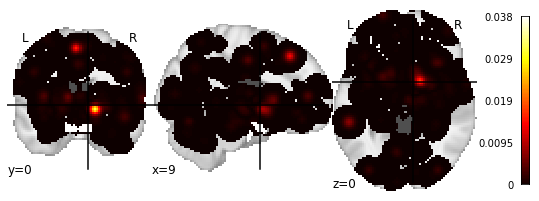

In [362]:
essai_map = plot_stat_map(essai)
plt.show()

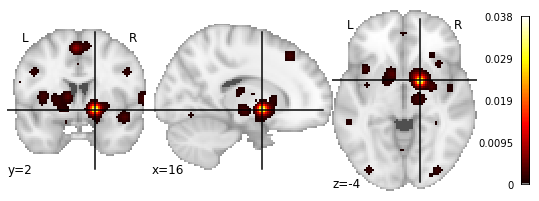

In [363]:
essai_map = plot_stat_map(essai, threshold=0.001)
plt.show()

/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/nilearn/plotting/html_document.py:56: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



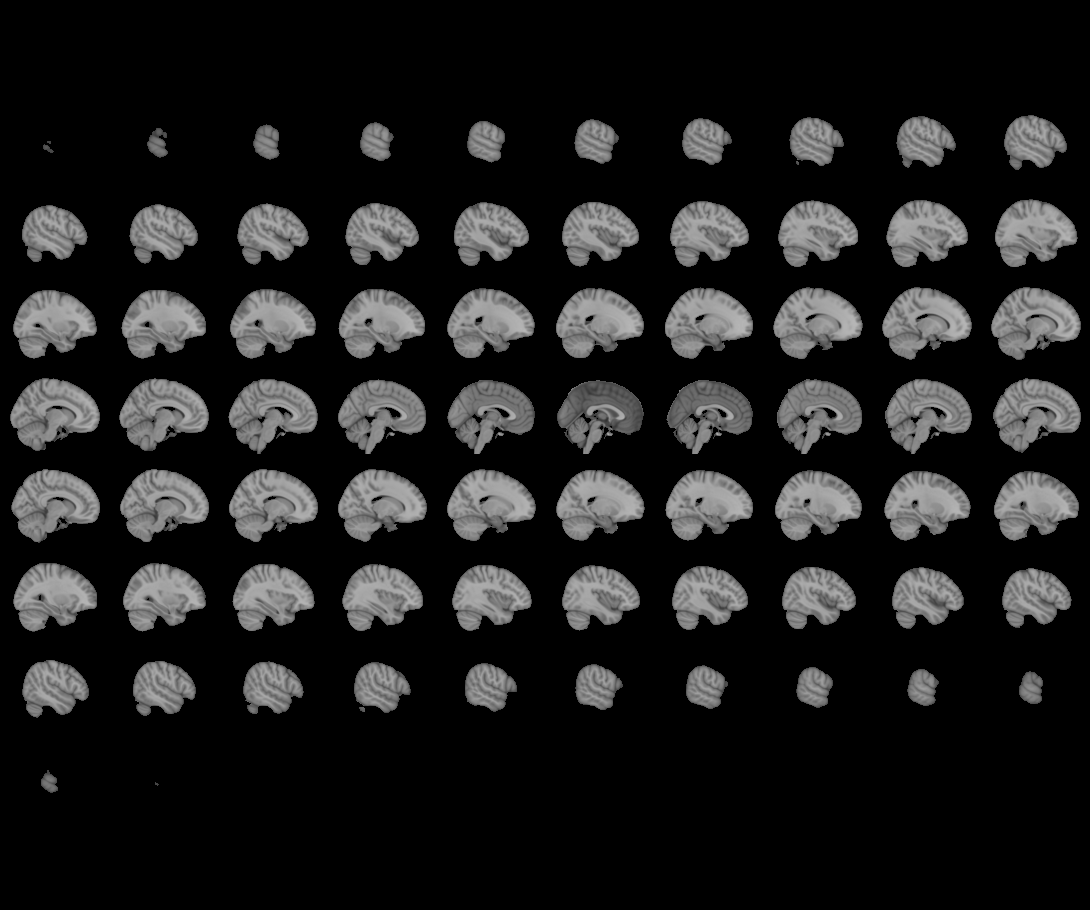
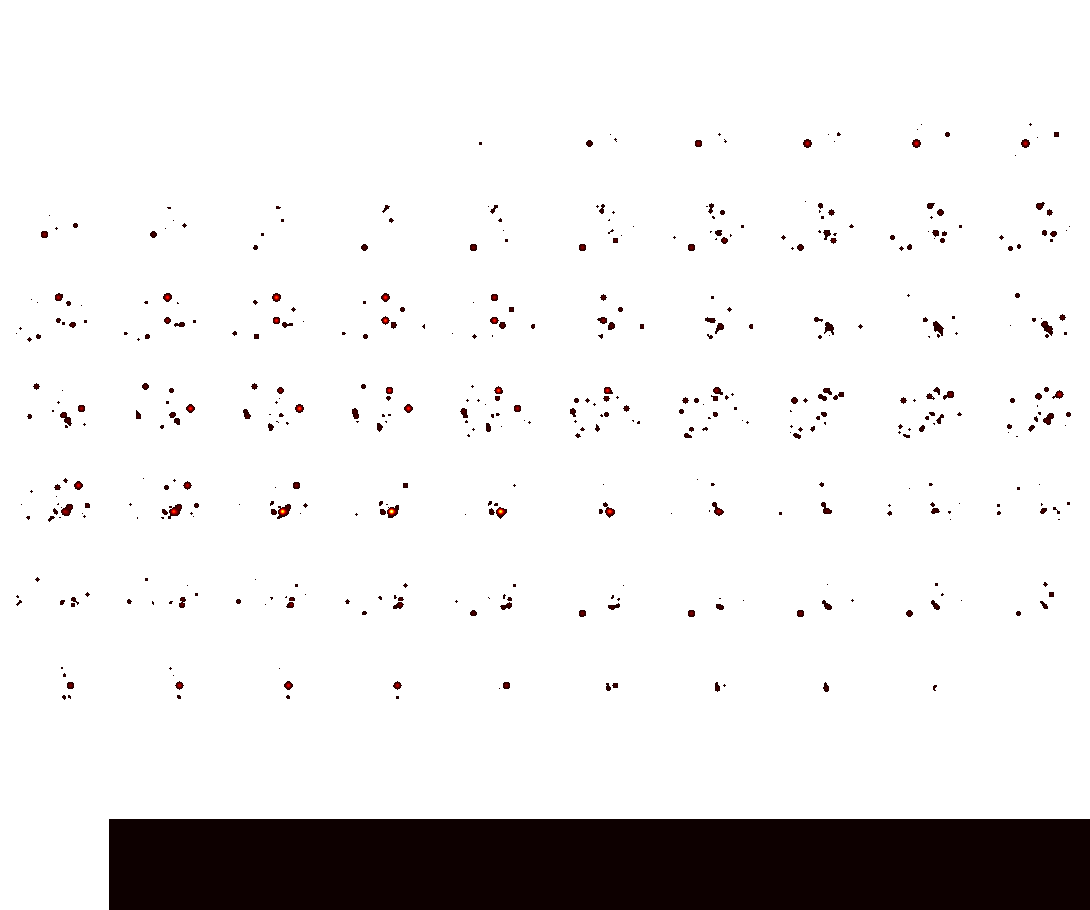

In [364]:
#Save the image to show in the presentation 
from nilearn import plotting
from nilearn.plotting import view_img

feature_img = plotting.view_img(essai, threshold=0.001) 
feature_img

In [386]:
#Save the image 
feature_img.save_as_html("Validation Model coeficient features image.html")
essai_map.savefig('Validation Model coeficient features map.png')

Test the model on test set 

In [366]:
l_svc.fit(X_train1,y_train1)

SVC(kernel='linear')

accuracy =  0.8333333333333334
MAE =  0.16666666666666666


/Users/laurencegrenier/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Predicted Conditions')

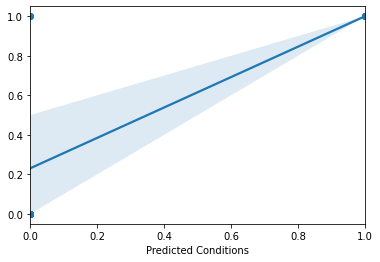

In [367]:
# predict the *validation* data based on the model trained on X_train2
y_pred = l_svc.predict(X_test) 

# caluclate the model accuracy
acc = l_svc.score(X_test, y_test) 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)

# print results
print('accuracy = ', acc)
print('MAE = ',mae)

sns.regplot(y_pred,y_test)
plt.xlabel('Predicted Conditions')

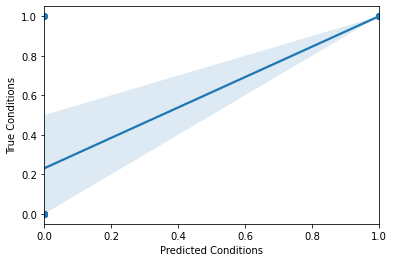

In [368]:
#save the image to show in the presentation 
import pandas as pd
x, y2 = pd.Series(y_pred, name="Predicted Conditions"), pd.Series(y_test, name="True Conditions")
accuracy = sns.regplot(x=x, y=y2)
accuracy.figure.savefig("accuracy.png")

In [369]:
matrix_con_test = confusion_matrix (y_true = y_test, y_pred = y_pred) 

In [370]:
print(matrix_con_test)

[[10  0]
 [ 3  5]]


In [371]:
from pandas import DataFrame
cmdf3 = DataFrame(matrix_con_test, index = ['Needs','Wants'], columns = ['Needs','Wants'])

In [372]:
import seaborn as sns

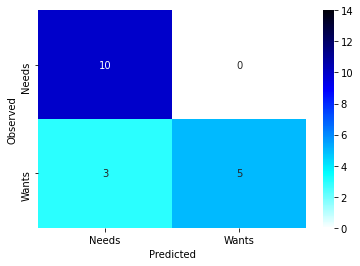

In [378]:
ax = sns.heatmap(cmdf3, cmap = "black_blue_r", vmin = 0, vmax = 14, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Observed')
ax.figure.savefig("Confusion_matrice_test.png")

In [381]:
l_svc.coef_

array([[ 3.80989403e-06,  7.44035510e-06,  1.11214602e-05, ...,
        -1.41961701e-12, -8.15318262e-12,  0.00000000e+00]])

In [382]:
coef2 = np.abs(l_svc.coef_)
print(coef2)

[[3.80989403e-06 7.44035510e-06 1.11214602e-05 ... 1.41961701e-12
  8.15318262e-12 0.00000000e+00]]


In [383]:
coef3 = l_svc.coef_

In [384]:
essai3= mask.inverse_transform(coef3)
essai2 = mask.inverse_transform(coef2)

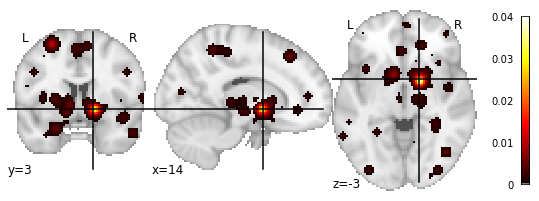

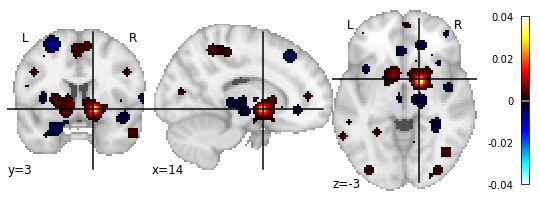

In [389]:
essai2_map = plot_stat_map(essai2, threshold=0.001)
essai3_map = plot_stat_map(essai3, threshold=0.001)
essai3_map.savefig('Coeficient map')
essai2_map.savefig('Abs Coeficient map')

In [390]:
from nilearn import plotting 
from nilearn.plotting import view_img_on_surf 

features_plot = plotting.view_img_on_surf(essai3)

In [391]:
features_plot

In [393]:
features_plot.save_as_html("Model coeficient features interactive plot.html")